In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from wordcloud import WordCloud
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
#importing datasets
df1 = pd.read_csv('most_used_screens.csv')
df2 = pd.read_csv('mobileusebasedata.csv')
df3 = pd.read_csv('mobileusebasedata_engineered.csv')

In [3]:
df4 = df2.copy()
#creating a copy of df2 dataset as it will be altered later and hence df4 can retain an original 
#copy of the data

In [4]:
df1

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone
5,5,BankVerification
6,6,VerifyDateOfBirth
7,7,ProfilePage
8,8,VerifyCountry
9,9,Cycle


In [5]:
df2

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [6]:
df3

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0


In [7]:
df1.drop(columns=df1.columns[0], inplace=True)

dropping Unnamed: 0 column as it provided a redundant index which was not required

In [8]:
#checking for null values in all the datasets
df = [df1, df2, df3]
for i in df :
    print(i.isna().sum())

top_screens    0
dtype: int64
user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64
user                       0
dayofweek                  0
hour                       0
age                        0
numscreens                 0
minigame                   0
used_premium_feature       0
enrolled                   0
liked                      0
location                   0
Institutions               0
VerifyPhone                0
BankVerification           0
VerifyDateOfBirth          0
ProfilePage                0
VerifyCountry              0
Cycle                      0
idscreen                   0
Splash                     0
RewardsContainer           0
EditProfile      

only mobileusebasedata.csv contains null values which are concentrated in just 1 column and comprises of a significant part of the dataset. Hence, enrolled_date column will be dropped

In [9]:
col_to_drop = ['enrolled_date']
#creating a list of columns which need to be dropped before modelling

In [10]:
#checking the datatypes of features in all the datasets
for i in df :
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   top_screens  58 non-null     object
dtypes: object(1)
memory usage: 592.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_da

In [11]:
#getting the statistical properties of features in the datasets
from IPython.core import display as ICD
ICD.display(df1.describe())
ICD.display(df2.describe())
ICD.display(df3.describe())

,top_screens
count,58
unique,58
top,Loan2
freq,1


,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,0.293660,0.524600,0.319540,0.473480,0.158040,0.423160,0.364860,0.340700,0.200760,0.084000,0.048980,0.076540,0.073720,0.051520,0.053860,0.045080,0.030920,0.041420,0.047560,0.0,0.0455,0.041060,0.024420,0.026220,0.023580,0.031760,0.022460,0.029800,0.021160,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,0.455443,0.499399,0.466303,0.499301,0.364782,0.494065,0.481396,0.473949,0.400573,0.277391,0.215828,0.265863,0.261317,0.221058,0.225743,0.207482,0.173103,0.199262,0.212836,0.0,0.2084,0.198431,0.154351,0.159791,0.151738,0.175362,0.148176,0.170037,0.143919,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23

In [12]:
print(df2['enrolled'].value_counts())                #total number of enrolled and not enrolled users
print(df2['enrolled'].value_counts('y')*100)         #percentage of enrolled and not enrolled users

1    31074
0    18926
Name: enrolled, dtype: int64
1    62.148
0    37.852
Name: enrolled, dtype: float64


we observe a little imbalance in the dataset with the ratio being 62% to 37%, but this should not impact model performance significantly

In [13]:
df2['first_open'] = pd.to_datetime(df2['first_open'])

<AxesSubplot:xlabel='first_open'>

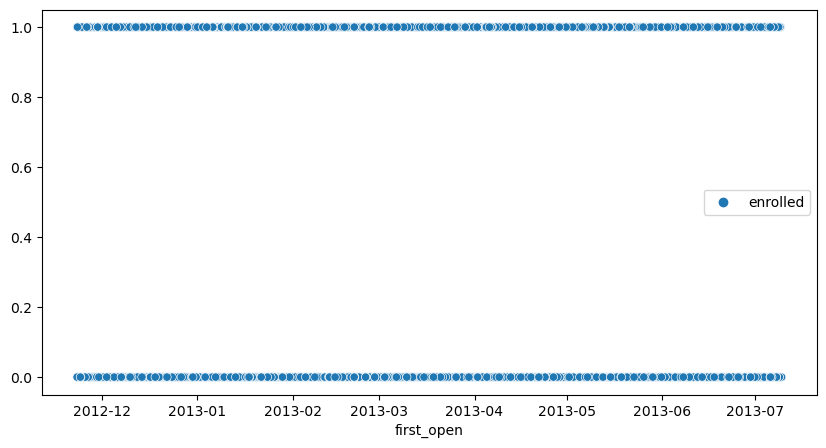

In [14]:
#creating a scatterplot between first_open and enrolled
df5 = df2[['first_open', 'enrolled']]
df5.set_index('first_open', inplace = True)
plt.figure(figsize=(10, 5))
sns.scatterplot(data = df5)

as we can see there isn't any correlation between first_open and enrolled and hence it too can be dropped

In [15]:
col_to_drop += ['first_open']

In [16]:
#extracting hour information from hour column
df2['hour'] = df2['hour'].str.strip()
df2['hour'] = pd.to_datetime(df2['hour'], format='%H:%M:%S')
df2['hour'] = df2['hour'].dt.hour

In [17]:
df2[df2.duplicated()]

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
9126,44123,2012-12-25 18:56:18.691,1,18,46,"Cycle,Loan2,Loan1,Rewardjoinscreen,RewardsCont...",18,0,1,0,NaN,0
10230,266497,2013-03-23 19:10:48.003,5,19,29,"Splash,Cycle,Home,Loan2,Loan1,History,RewardsC...",10,0,1,0,NaN,0
15023,268376,2012-12-07 05:29:31.243,4,5,25,"joinscreen,product_review,product_review2,Scan...",10,0,0,0,NaN,0
15482,258836,2013-05-20 14:46:30.286,0,14,25,"idscreen,Splash,Home,product_review,product_re...",57,1,1,1,2013-05-20 14:50:13.666,0
19207,116730,2013-07-04 16:37:04.850,3,16,28,"idscreen,Home,Loan3,Loan1,WebView,Finances,Cre...",26,0,0,0,NaN,0
20576,160267,2013-04-11 00:26:21.829,3,0,29,"idscreen,Home,SelectInstitution,BankVerificati...",38,0,0,1,2013-04-11 00:34:37.985,0
21925,218403,2013-06-08 11:44:54.612,5,11,33,"idscreen,Cycle,location,VerifyDateOfBirth,Veri...",24,1,0,1,2013-06-08 11:49:16.463,0
26695,210209,2013-06-12 00:25:42.660,2,0,49,"Home,product_review,product_review,product_rev...",16,0,1,0,NaN,0
27815,111620,2013-04-26 15:29:58.920,4,15,26,"product_review,RewardDetail,RewardsContainer",3,0,0,1,2013-06-29 20:47:20.924,0
29823,18967,2013-05-19 15:58:47.224,6,15,27,"Splash,idscreen,Cycle,product_review,product_r...",15,0,0,1,2013-05-24 02:45:30.698,0


In [18]:
df2.drop_duplicates(inplace=True)
df2.reset_index(inplace=True)

the duplicated rows can be dropped as they form a very small percentage of the complete dataset

#### Feature Engineering

In [19]:
def splitter(t) :
    t = t.split(',')
    return t

In [20]:
df2['screen_split'] = df2['screen_list'].apply(splitter)

In [21]:
res = set()
for i in df2.index :
    tset = set(df2['screen_split'][i])
    for j in tset :
        res.add(j)
res

{'About',
 'AccountView',
 'AddProperty',
 'AddVehicle',
 'AdverseActions',
 'Alerts',
 'BVPlaidLinkContainer',
 'BVStats',
 'BankVerification',
 'BoostFriendsList',
 'CC1',
 'CC1Category',
 'CC3',
 'CameraScreen',
 'CommunityAndInvites',
 'ContactInfoConfirm',
 'Credit1',
 'Credit2',
 'Credit3',
 'Credit3Alerts',
 'Credit3CTA',
 'Credit3Container',
 'Credit3Dashboard',
 'Credits',
 'Cycle',
 'EditProfile',
 'EmploymentInfo',
 'EmploymentSummary',
 'Finances',
 'FindFriendsCycle',
 'ForgotPassword',
 'GroupedInstitutions',
 'History',
 'Home',
 'IdAndSelfieCameraScreen',
 'IdentityVerification',
 'InstantLoanSSN',
 'InstantOfferCreateAccount',
 'Institutions',
 'LLLoanAmount',
 'LandingScreen',
 'Leaderboard',
 'ListPicker',
 'Loan',
 'Loan1',
 'Loan2',
 'Loan3',
 'Loan4',
 'LoanAppAgreement',
 'LoanAppBankInfo',
 'LoanAppConfirmWithdrawal',
 'LoanAppDenied',
 'LoanAppESign',
 'LoanAppLoan4',
 'LoanAppPaymentSchedule',
 'LoanAppPromoCode',
 'LoanAppReasons',
 'LoanAppRequestAmount',
 '

In [22]:
len(res)      #total number of unique screens visited by the users

137

In [23]:
len(df1)      #number of screens in top_screens

58

In [24]:
df2.drop(columns=['screen_list', 'index'], inplace=True)

In [25]:
df1_val_list = set(df1['top_screens'].value_counts().index.tolist())
df2_col_list = set(df2.columns)
df3_col_list = set(df3.columns)

In [26]:
df2_new_col = df3_col_list-df2_col_list

In [27]:
df2[list(df2_new_col)] = 0             #creating the required columns

In [28]:
df2.head(3)

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,screen_split,Splash,VerifyMobile,ProfileMaritalStatus,Leaderboard,ProfileEmploymentLength,VerifyAnnualIncome,Cycle,VerifyDateOfBirth,RewardsContainer,EditProfile,ProfileJobTitle,Alerts,Institutions,NetworkFailure,Other,ProfileChildren,AccountView,SavingCount,BankVerification,VerifyHousingAmount,Login,VerifyIncomeType,VerifyPhone,LoansCount,ResendToken,Finances,CCCount,location,ProfileEducationMajor,TransactionList,RewardDetail,ListPicker,VerifyHousing,Rewards,VerifyCountry,SecurityModal,CMCount,idscreen,ProfileEducation,WebView,ProfilePage
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaN,0,"[idscreen, joinscreen, Cycle, product_review, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaN,0,"[joinscreen, product_review, product_review2, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaN,1,"[Splash, Cycle, Loan]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
col_to_avoid = df1_val_list-df3_col_list              #screens which need to be aggregated
df1_val_list = list(df1_val_list - col_to_avoid)
col_to_avoid

{'CC1',
 'CC1Category',
 'CC3',
 'Credit1',
 'Credit2',
 'Credit3',
 'Credit3Container',
 'Credit3Dashboard',
 'Loan',
 'Loan2',
 'Loan3',
 'Loan4',
 'Saving1',
 'Saving10',
 'Saving2',
 'Saving2Amount',
 'Saving4',
 'Saving5',
 'Saving6',
 'Saving7',
 'Saving8',
 'Saving9'}

In [30]:
col_to_aggregate = ['CCCount',               #screen categrories which the col_to_avoid 
 'CMCount',                                  #need to be aggreagated into
 'LoansCount',
 'Other',
 'ProfileChildren ',
 'SavingCount']

In [31]:
#populating the new columns
for i in df2.index :
    for j in range(len(df2.loc[i, 'screen_split'])):
        t = df2.loc[i, 'screen_split'][j]
        if t in df1_val_list:
            df2.loc[i, t] += 1
        elif t in col_to_avoid :
            if t in set(['Loan','Loan2','Loan3','Loan4',]):
                df2.loc[i, 'LoansCount'] += 1
            elif t in set(['Saving1','Saving10','Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9']):
                df2.loc[i, 'SavingCount'] += 1
            elif t in set(['CC1', 'CC1Category', 'CC3']):
                df2.loc[i, 'CCCount'] += 1
            elif t in set(['Credit3Container', 'Credit3', 'Credit2', 'Credit1','Credit3Dashboard']):
                df2.loc[i, 'CMCount'] += 1
        else :
            df2.loc[i, 'Other'] += 1

In [32]:
df2.drop(columns=['screen_split'], inplace = True)     #dropping screen_split as the information is
df2                                                    #present in the new column

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,Splash,VerifyMobile,ProfileMaritalStatus,Leaderboard,ProfileEmploymentLength,VerifyAnnualIncome,Cycle,VerifyDateOfBirth,RewardsContainer,EditProfile,ProfileJobTitle,Alerts,Institutions,NetworkFailure,Other,ProfileChildren,AccountView,SavingCount,BankVerification,VerifyHousingAmount,Login,VerifyIncomeType,VerifyPhone,LoansCount,ResendToken,Finances,CCCount,location,ProfileEducationMajor,TransactionList,RewardDetail,ListPicker,VerifyHousing,Rewards,VerifyCountry,SecurityModal,CMCount,idscreen,ProfileEducation,WebView,ProfilePage
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaN,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,7,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaN,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,3,0,0,0,0
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,10,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49980,222774,2013-05-09 13:46:17.871,3,13,32,13,0,0,1,2013-05-09 13:47:52.875,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
49981,169179,2013-04-09 00:05:17.823,1,0,35,4,0,1,0,NaN,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49982,302367,2013-02-20 22:41:51.165,2,22,39,25,0,0,0,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
49983,324905,2013-04-28 12:33:04.288,6,12,27,26,0,0,1,2013-04-28 12:35:38.709,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,13,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


EDA

In [33]:
df2['first_open'] = pd.to_datetime(df2['first_open'])
df2['enrolled_date'] = pd.to_datetime(df2['enrolled_date'])
df2['days_taken_to_enroll'] = (df2['enrolled_date'] - df2['first_open']).dt.days
df2['adjusted_registered_date'] = (df2['first_open'] + pd.to_timedelta(df2['days_taken_to_enroll'], unit='D')).dt.date
ad_registered_users_by_date = df2.groupby(by='adjusted_registered_date')['enrolled'].sum()
ad_registered_users_by_date

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\timedeltas.py:1014: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\timedeltas.py:1018: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


adjusted_registered_date
2012-11-23     27
2012-11-24     36
2012-11-25     28
2012-11-26     34
2012-11-27     29
             ... 
2013-07-05    228
2013-07-06    195
2013-07-07    214
2013-07-08    206
2013-07-09     63
Name: enrolled, Length: 229, dtype: int64

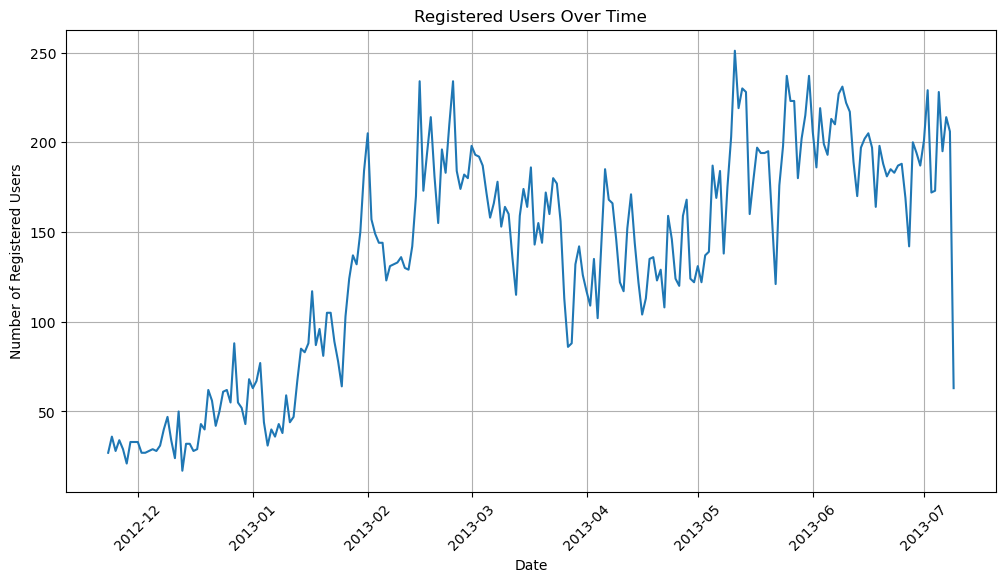

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(ad_registered_users_by_date.index, ad_registered_users_by_date.values)
plt.xlabel('Date')
plt.ylabel('Number of Registered Users')
plt.title('Registered Users Over Time')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()

We notice that there is an upward trend in the number of people enrolling each day which indicates success of the feature of Buy Now Pay Later

<AxesSubplot:xlabel='numscreens', ylabel='Count'>

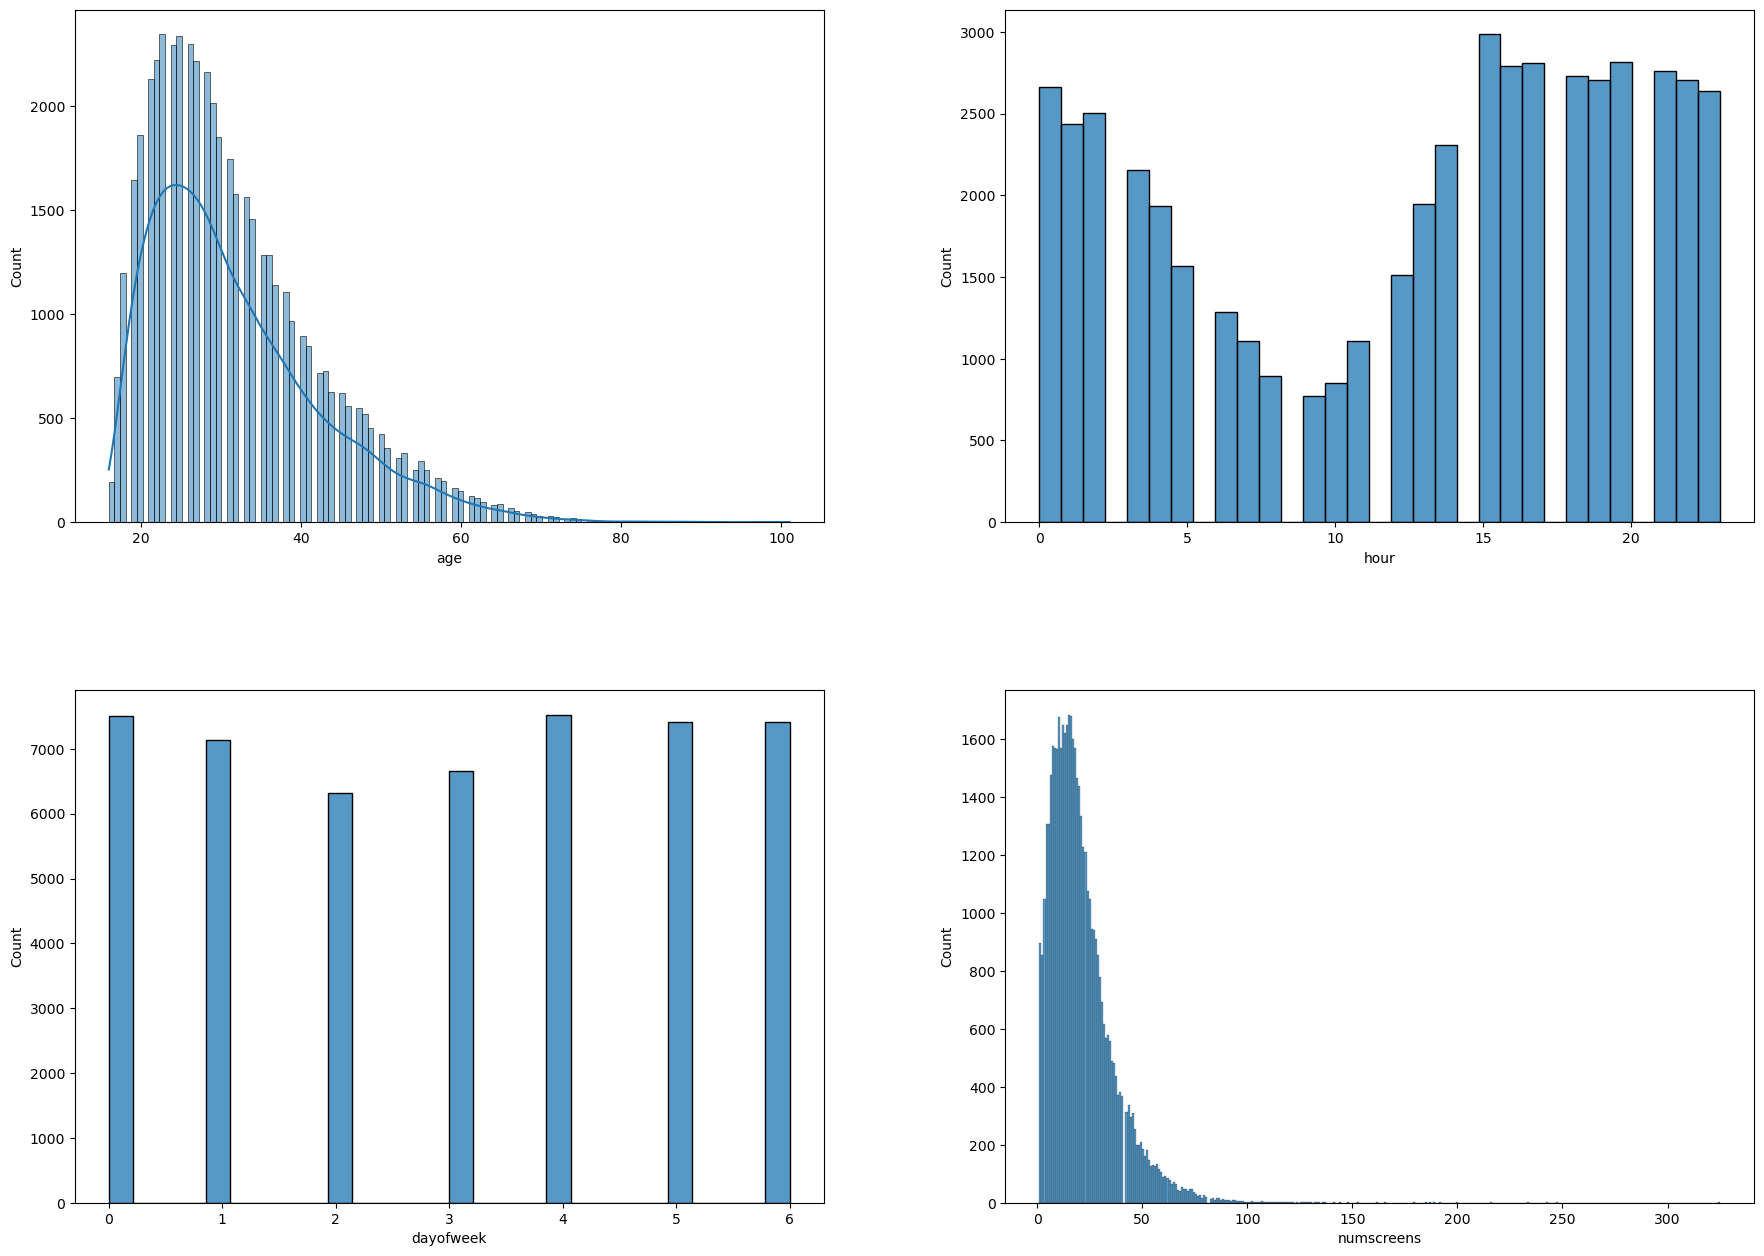

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20, 15))
fig.tight_layout(pad=10)

sns.histplot(df2["age"],label="enrolled", kde = True, ax = axes[0][0])
sns.histplot(df2["hour"], ax = axes[0][1])
sns.histplot(df2["dayofweek"], ax = axes[1][0])
sns.histplot(df2["numscreens"], ax = axes[1][1])

#plots for the entire dataset

<AxesSubplot:xlabel='numscreens', ylabel='Count'>

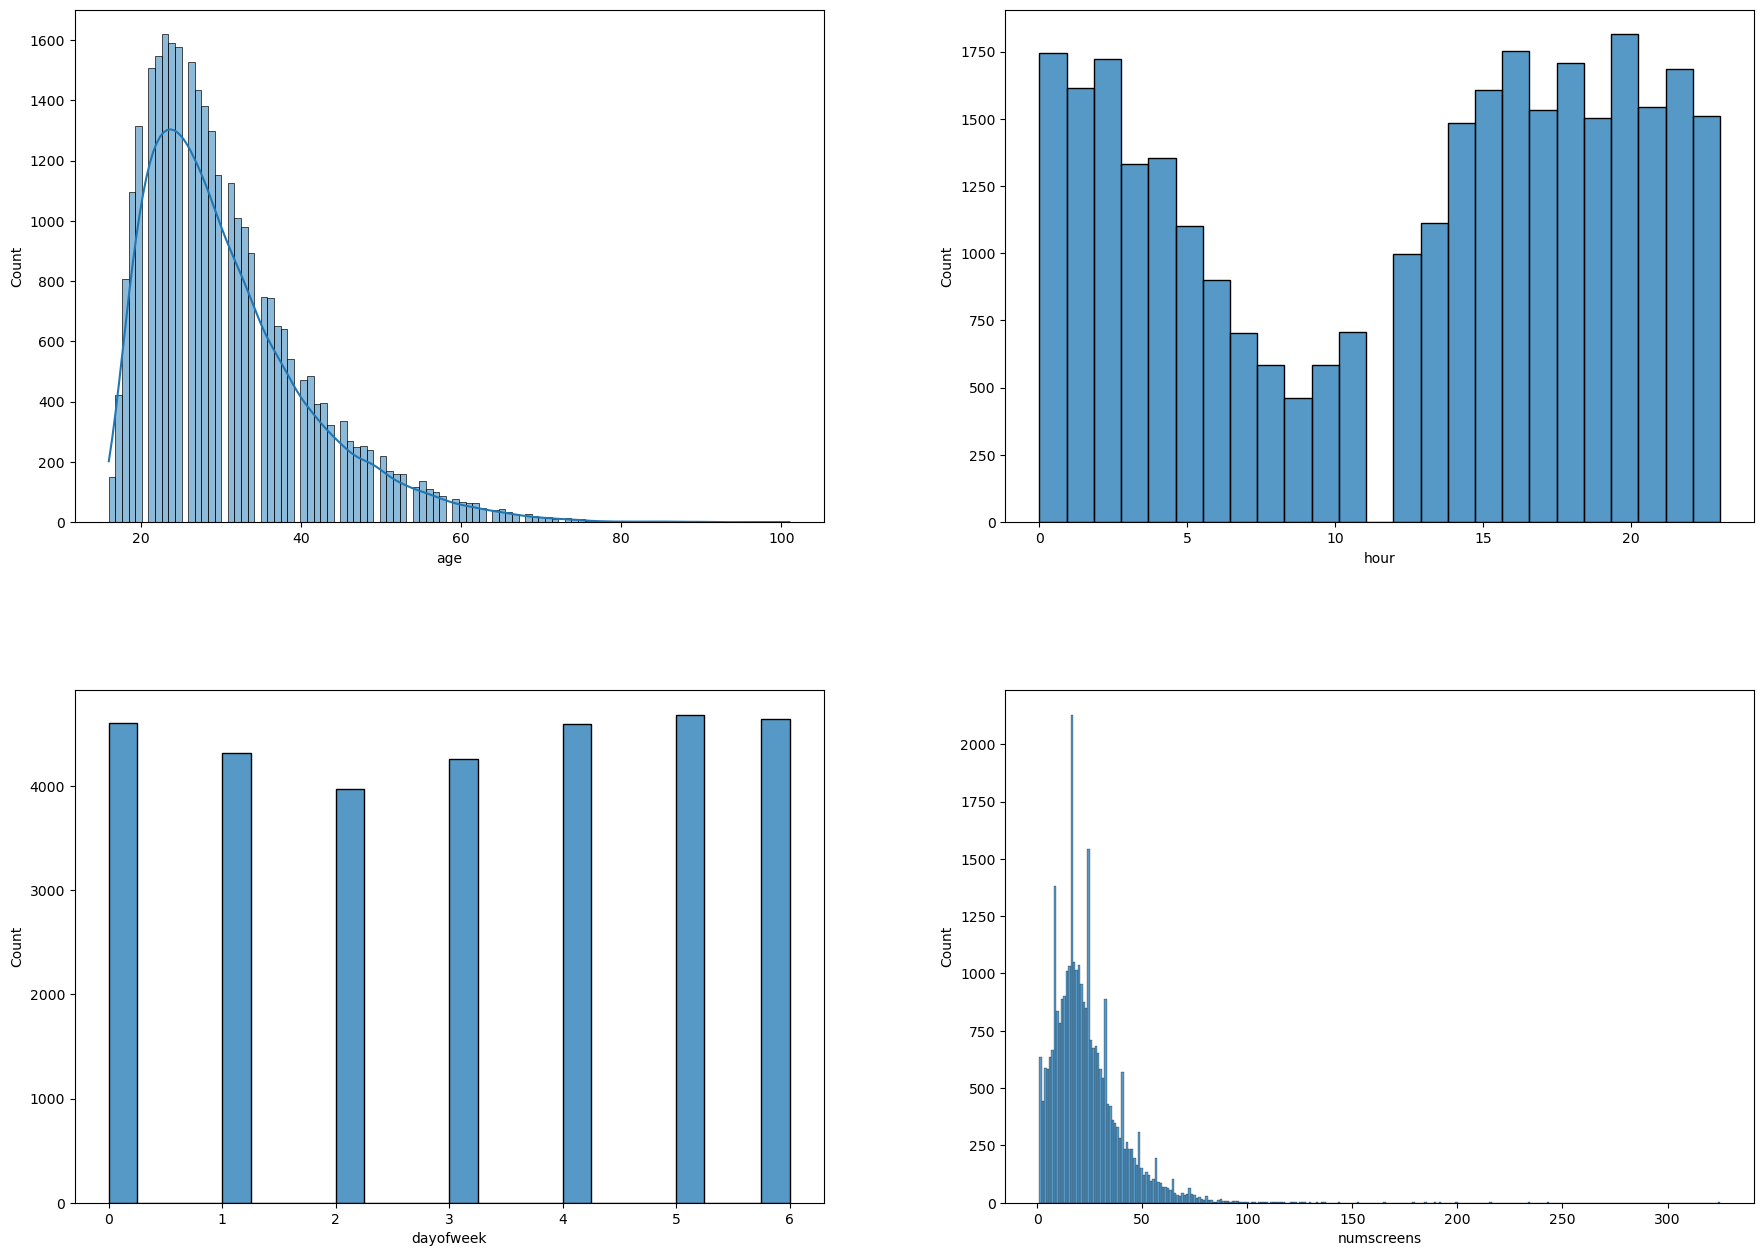

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20, 15))
fig.tight_layout(pad=10)

sns.histplot(df2[df2['enrolled'] == 1]["age"],label="enrolled", kde = True, ax = axes[0][0])
sns.histplot(df2[df2['enrolled'] == 1]["hour"], ax = axes[0][1])
sns.histplot(df2[df2['enrolled'] == 1]["dayofweek"], ax = axes[1][0])
sns.histplot(df2[df2['enrolled'] == 1]["numscreens"], ax = axes[1][1])

#plots for the enrolled userbase

We see that the age group with max number of customers enrolled is 20-25

In [ ]:
df2[['']]

Text(0, 0.5, 'Counts')

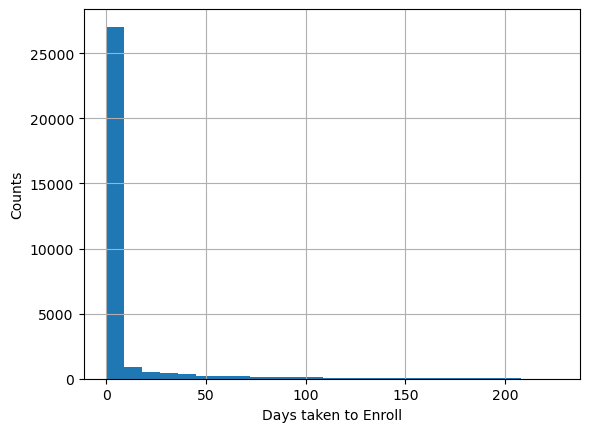

In [37]:
df2['days_taken_to_enroll'].hist(bins=25)
plt.xlabel('Days taken to Enroll')
plt.ylabel('Counts')

the above plot shows that most users who enroll for BNPL do so early when they start using the app

In [38]:
for i in df2.columns[:9] :
    if i in ['minigame', 'used_premium_feature'] :
        print(df2[i].value_counts().sort_index(), end = '\n\n')

#getting value counts for minigame usage and used_premium_feature for the userbase

0    44596
1     5389
Name: minigame, dtype: int64

0    41388
1     8597
Name: used_premium_feature, dtype: int64



In [39]:
tdf = df2.groupby('enrolled')[['minigame', 'used_premium_feature', 'liked']].mean()*100
tdf

#seeing the distribution of minigames, used_premium_feature and liked 
#for enrolled and not enrolled users

,minigame,used_premium_feature,liked
enrolled,,,
0,6.61275,19.743102,16.841104
1,13.31960,15.650047,16.300254


this table shows the percent of people who have 1 for minigame, used_premium_feature and liked from people who have enrolled and not respectively

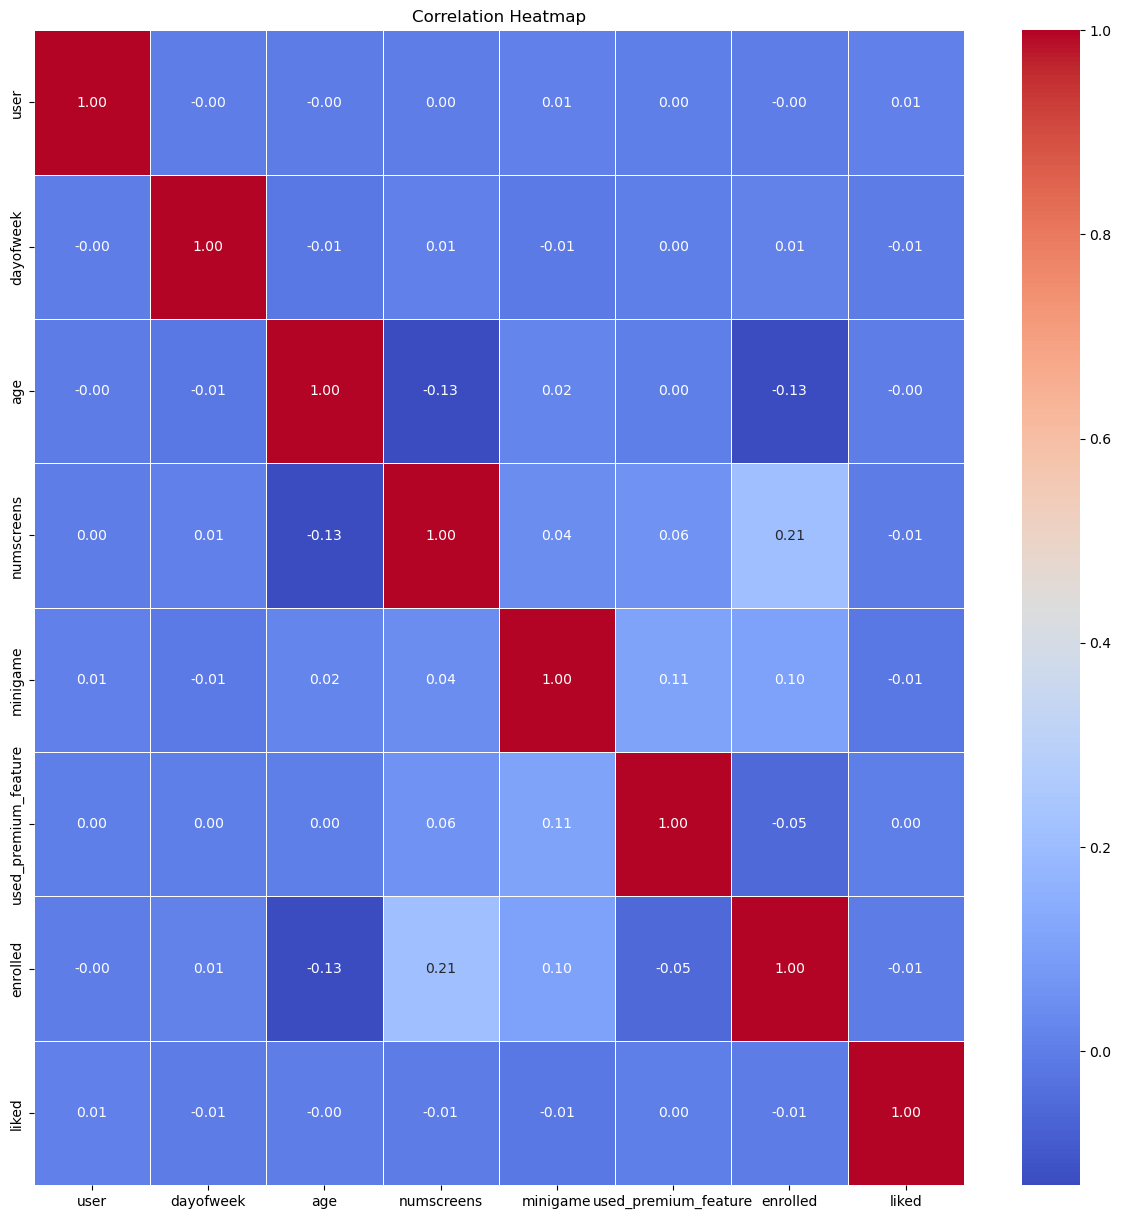

In [40]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df4.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title("Correlation Heatmap")
plt.show()

There is not multicollinearity present in the dataset, as can be seen from this heatmap

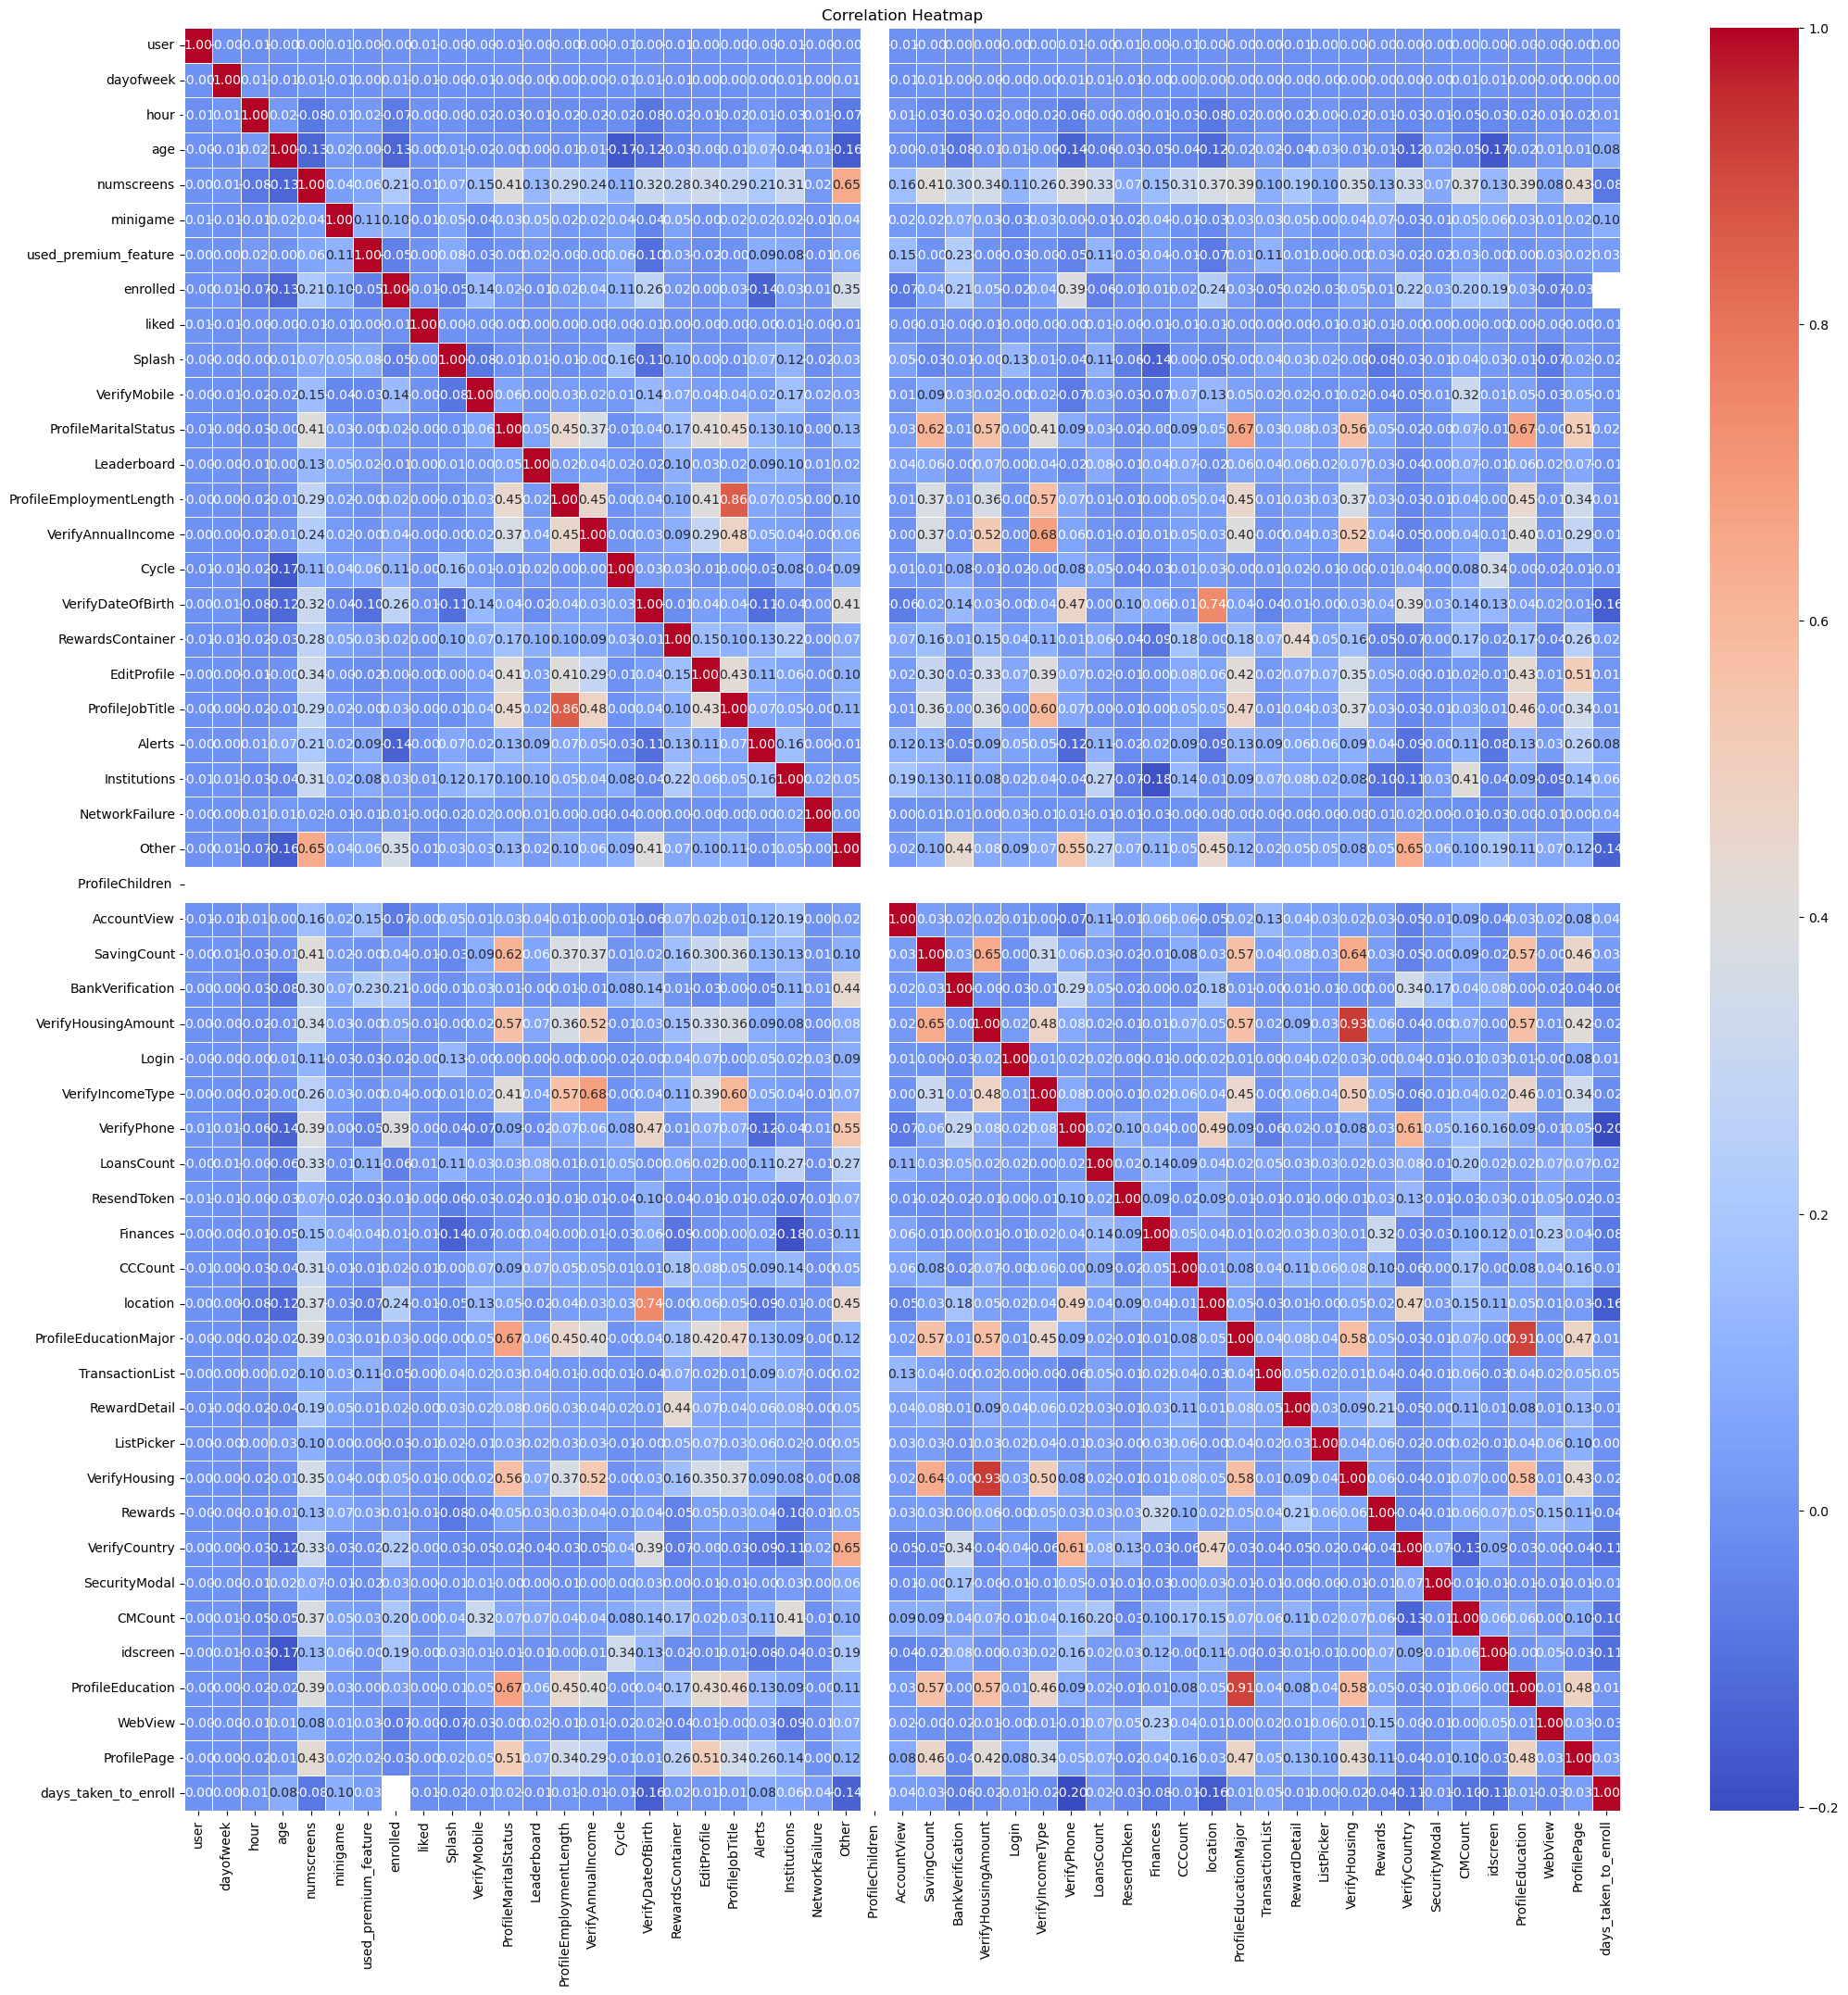

In [41]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title("Correlation Heatmap")
plt.show()

In [42]:
correlation_matrix = df2.corr()
high_corr_pairs = ((correlation_matrix > 0.75) & (correlation_matrix < 1.0)) | ((correlation_matrix < -0.75) & (correlation_matrix > -1.0))
for row in high_corr_pairs.index:
    for col in high_corr_pairs.columns:
        if high_corr_pairs.loc[row, col]:
            correlation_value = correlation_matrix.loc[row, col]
            print(f"Columns: {row}, {col} - Correlation: {correlation_value:.2f}")

Columns: ProfileEmploymentLength, ProfileJobTitle - Correlation: 0.86
Columns: ProfileJobTitle, ProfileEmploymentLength - Correlation: 0.86
Columns: VerifyHousingAmount, VerifyHousing - Correlation: 0.93
Columns: ProfileEducationMajor, ProfileEducation - Correlation: 0.91
Columns: VerifyHousing, VerifyHousingAmount - Correlation: 0.93
Columns: ProfileEducation, ProfileEducationMajor - Correlation: 0.91


based on this, we can conclude that some of these features exhibit multicollinearity and hence one feature can be dropped from these pairs

In [43]:
col_to_drop += ['ProfileJobTitle', 'VerifyHousing', 'ProfileEducation']

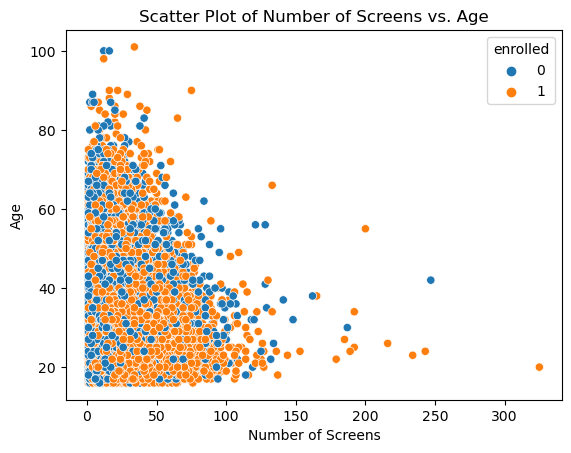

In [106]:
sns.scatterplot(data = df2, x = 'numscreens', y = 'age', hue = 'enrolled')
plt.xlabel('Number of Screens')
plt.ylabel('Age')
plt.title('Scatter Plot of Number of Screens vs. Age')
plt.show()

From this we can infer that youger people are using more screens or in other words spending more time on the app

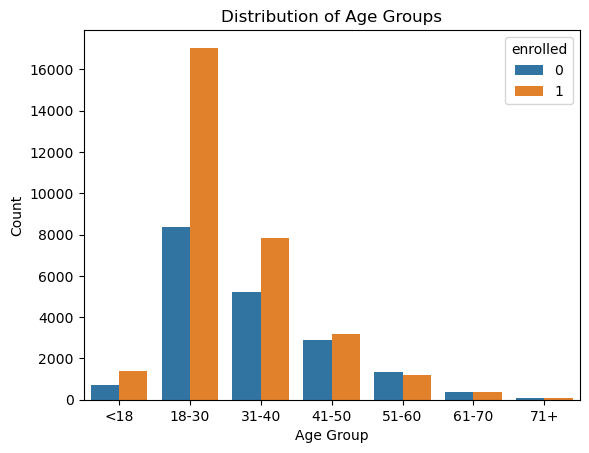

In [45]:
df2['age_group'] = pd.cut(df2['age'], bins=[0, 18, 30, 40, 50, 60, 70,  100], labels=['<18', '18-30', '31-40', '41-50','51-60','61-70','71+'])
sns.countplot(x='age_group', data=df2,hue='enrolled')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()

#binning the ages into 7 bins based on above scatterplot and context

<AxesSubplot:>

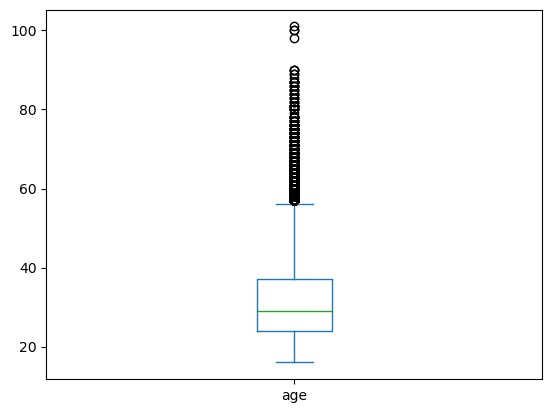

In [94]:
df2['age'].plot(kind = 'box')

In [100]:
t = [0.95, 0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995]
df2['age'].quantile(t)

0.950    53.0
0.955    54.0
0.960    55.0
0.965    56.0
0.970    57.0
0.975    58.0
0.980    60.0
0.985    62.0
0.990    64.0
0.995    68.0
Name: age, dtype: float64

In [107]:
age_cap = 75
df2.loc[df2["age"] >= age_cap] = age_cap

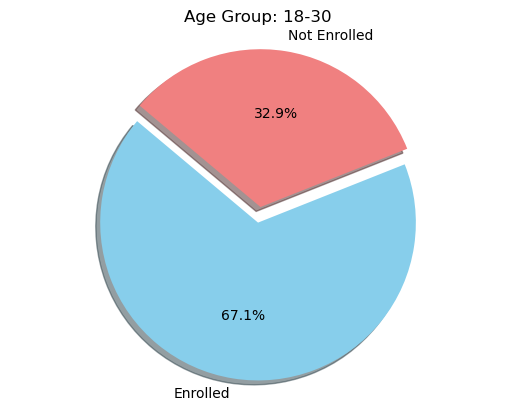

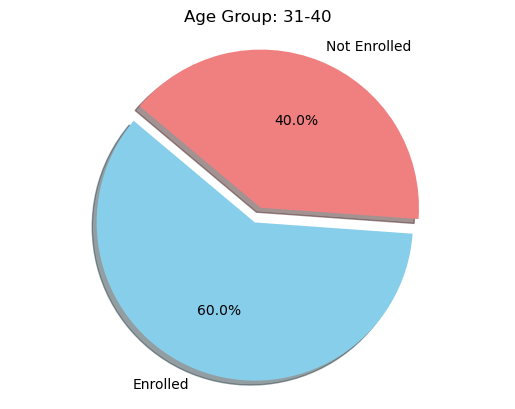

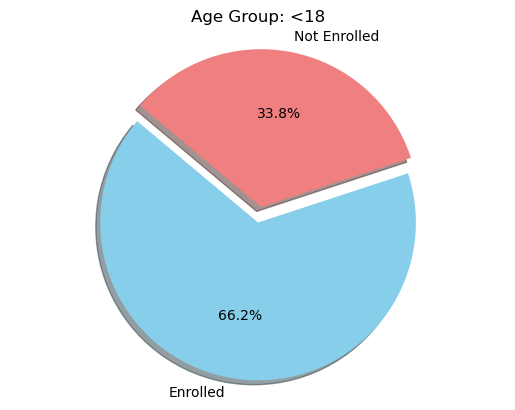

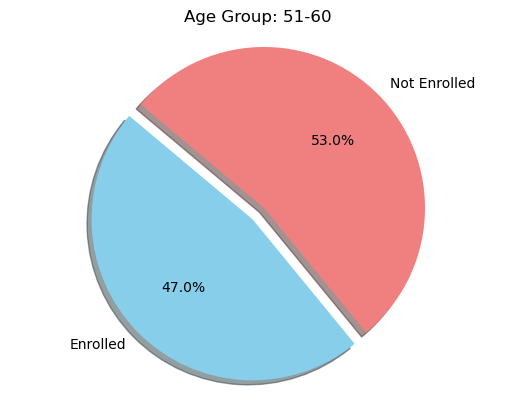

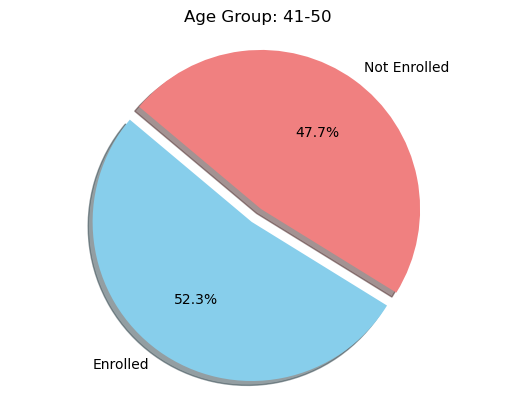

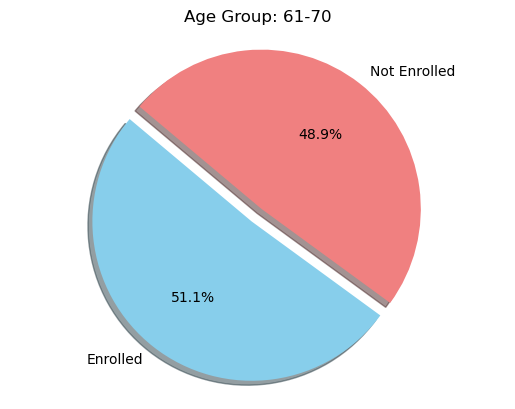

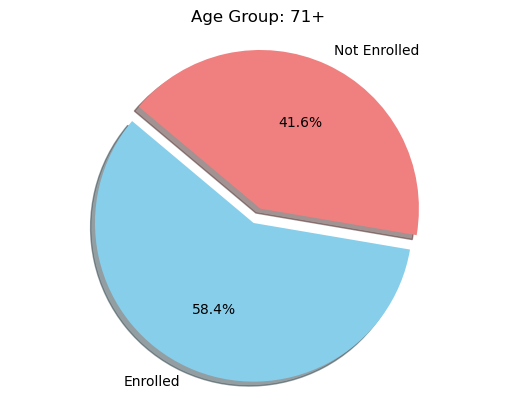

In [46]:
age_groups = df2['age_group'].unique()
for age_group in age_groups:
    subset = df2[df2['age_group'] == age_group]
    enrolled_count = subset[subset['enrolled'] == 1].shape[0]
    not_enrolled_count = subset[subset['enrolled'] == 0].shape[0]
    if enrolled_count > 0 or not_enrolled_count > 0:
        labels = ['Enrolled', 'Not Enrolled']
        sizes = [enrolled_count, not_enrolled_count]
        colors = ['skyblue', 'lightcoral']
        explode = (0.1, 0)  # Explode the 1st slice (Enrolled)
        plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title(f'Age Group: {age_group}')
        plt.show()

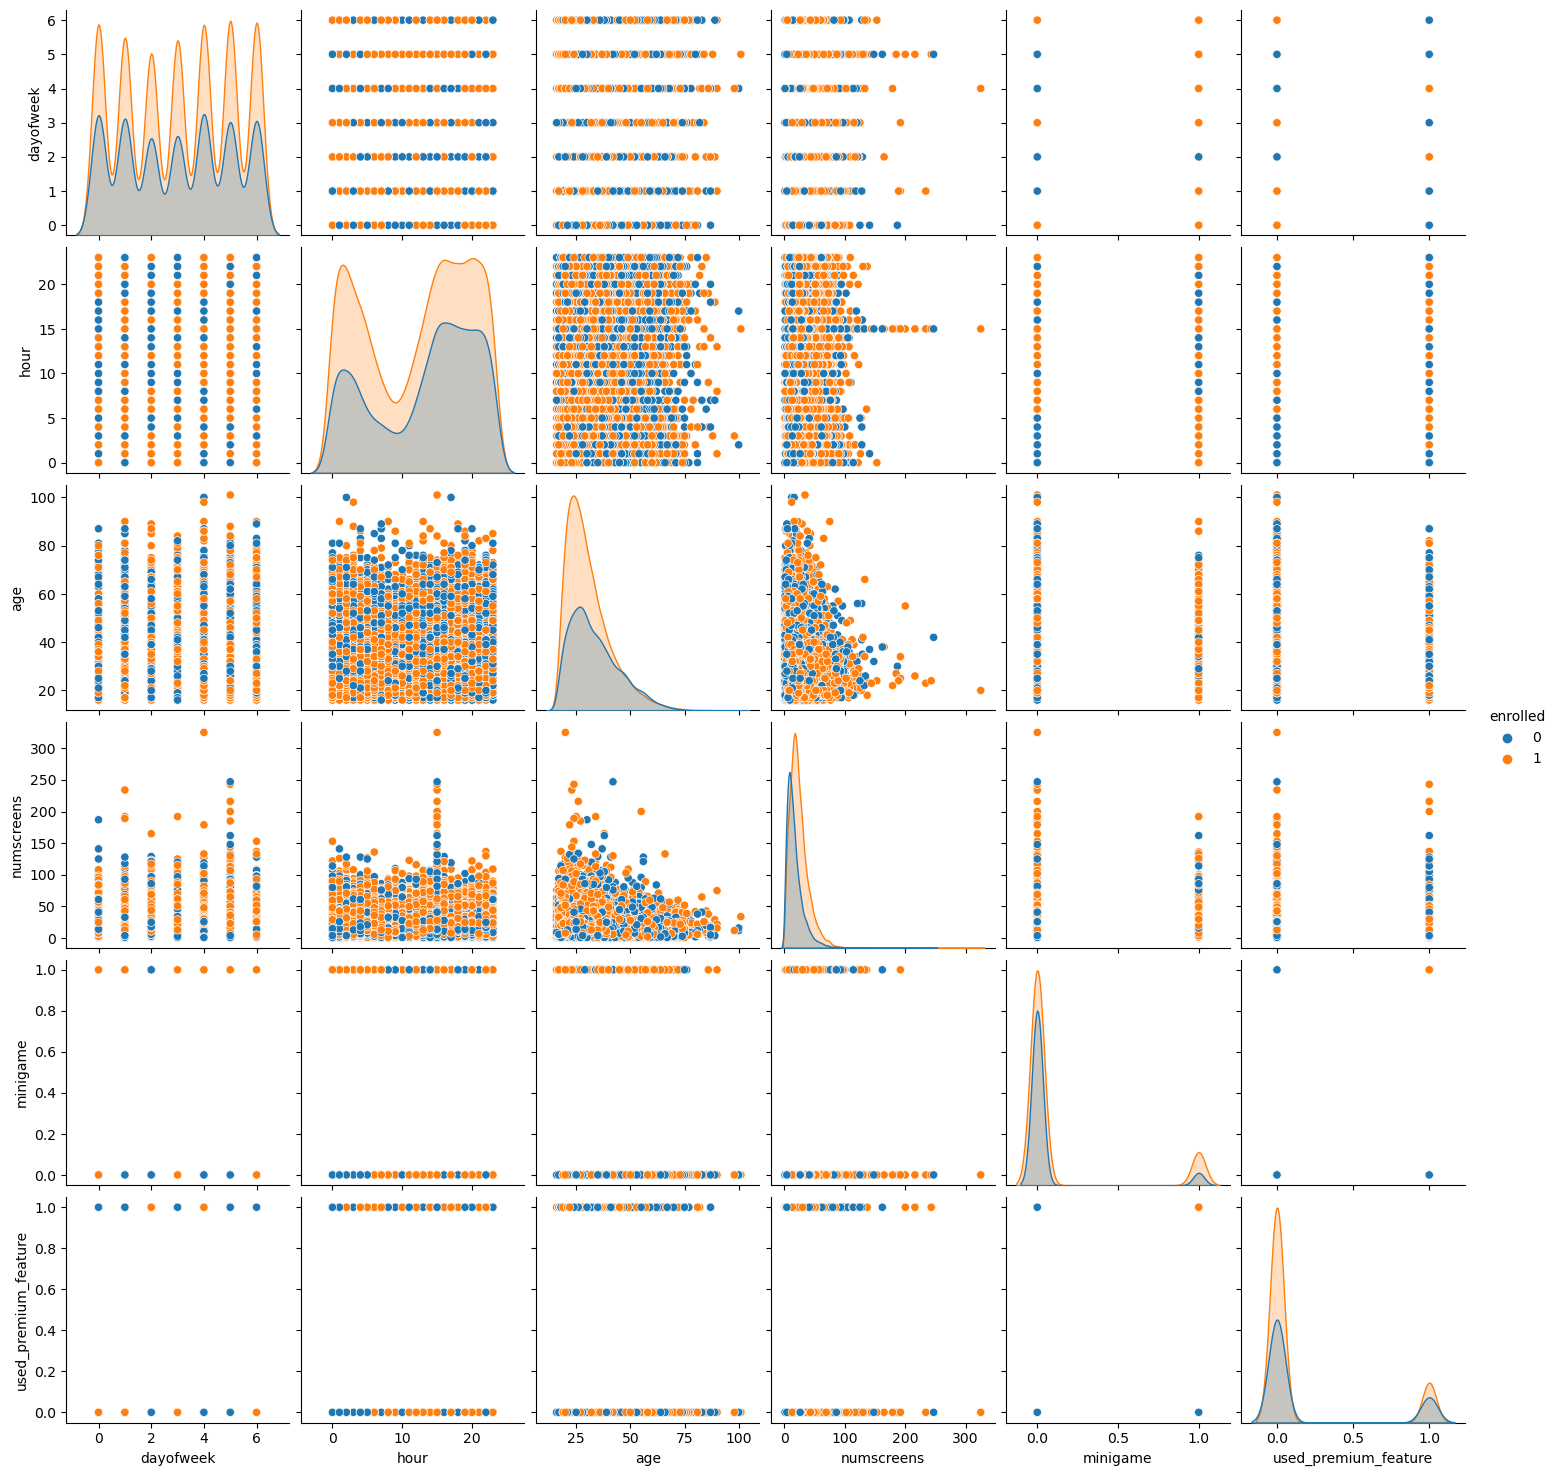

In [47]:
sns.pairplot(df2[df2.columns[1:9]], hue  = 'enrolled')

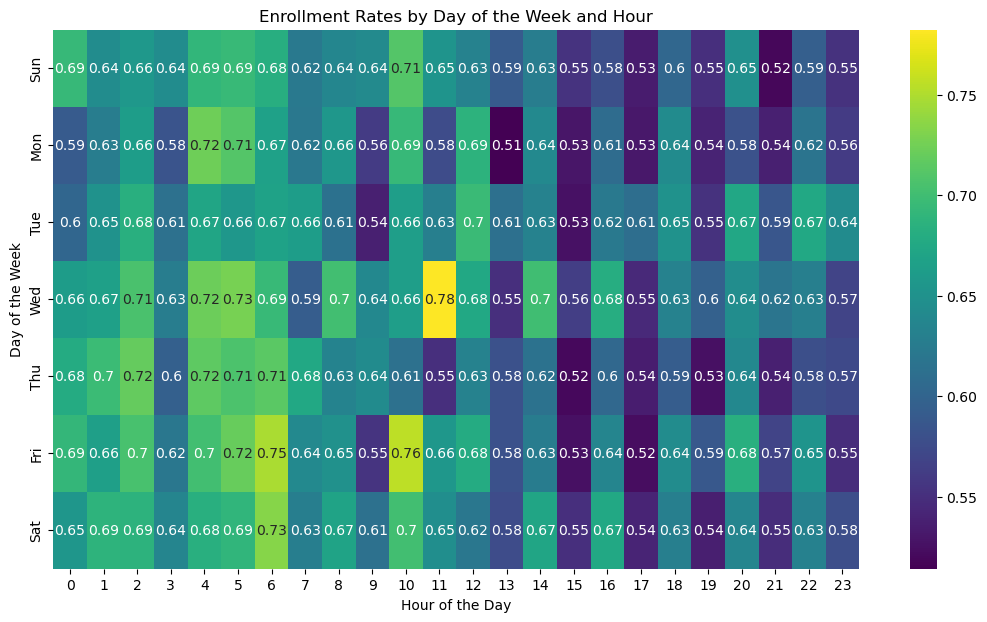

In [48]:
enrollment_rate_by_day_hour = df2.groupby(['dayofweek', 'hour'])['enrolled'].mean().unstack()

plt.figure(figsize=(13, 7))
sns.heatmap(enrollment_rate_by_day_hour, cmap='viridis', annot=True, xticklabels=range(24), yticklabels=['Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Enrollment Rates by Day of the Week and Hour')
plt.show()

In [49]:
def get_screen_counts(df) :
    res = pd.DataFrame()
    res['screen_name'] = 0
    res['count'] = 0
    l = 0
    for j in df.columns[11:-3].tolist():
        c = 0
        for i in df[j].value_counts().sort_index().index.tolist() :
            c += df[j].value_counts()[i] * i
        res.loc[len(res.index)] = [j, c]
        l += 1
    return res

In [50]:
cdf = pd.DataFrame()
screen_counts = get_screen_counts(df2)
screen_counts.sort_values(by = 'count', ascending=False, inplace=True)
screen_counts.reset_index(inplace=True)
cdf['screen_names_complete'] = screen_counts['screen_name']
cdf['counts_complete'] = screen_counts['count']

screen_counts = get_screen_counts(df2[df2['enrolled'] == 1])
screen_counts.sort_values(by = 'count', ascending=False, inplace=True)
screen_counts.reset_index(inplace=True)
cdf['screen_names_enrolled'] = screen_counts['screen_name']
cdf['counts_enrolled'] = screen_counts['count']

screen_counts = get_screen_counts(df2[df2['enrolled'] == 0])
screen_counts.sort_values(by = 'count', ascending=False, inplace=True)
screen_counts.reset_index(inplace=True)
cdf['screen_names_not_enrolled'] = screen_counts['screen_name']
cdf['counts_not_enrolled'] = screen_counts['count']

In [88]:
cdf[['screen_names_complete', 'screen_names_enrolled', 'screen_names_not_enrolled']]

,screen_names_complete,screen_names_enrolled,screen_names_not_enrolled
0,Other,Other,Other
1,CMCount,CMCount,LoansCount
2,LoansCount,VerifyPhone,CMCount
3,VerifyPhone,LoansCount,location
4,location,location,VerifyDateOfBirth
5,VerifyDateOfBirth,VerifyDateOfBirth,Cycle
6,VerifyCountry,VerifyCountry,SavingCount
7,SavingCount,idscreen,VerifyCountry
8,Cycle,SavingCount,VerifyPhone
9,idscreen,Cycle,Institutions


#### hypothesis testing

In [52]:
#Z-test on age and enrolled

enrolled_1 = df2[df2['enrolled'] == 1]['age']
enrolled_0 = df2[df2['enrolled'] == 0]['age']

# Performing the Z-test (two-sample Z-test for means)
z_statistic, p_value = stats.ttest_ind(enrolled_1, enrolled_0, alternative='two-sided')

alpha = 0.05

print(f"Z-Statistic: {z_statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Null hypothesis rejected. There is a significant difference in 'age' between enrolled=1 and enrolled=0.")
else:
    print("Null hypothesis cannot be rejected. There is no significant difference in 'age' between enrolled=1 and enrolled=0.")

Z-Statistic: -29.60433501220352
P-Value: 5.910754013943564e-191
Null hypothesis rejected. There is a significant difference in 'age' between enrolled=1 and enrolled=0.


In [53]:
#Z-test on numscreens and enrolled
enrolled_1 = df2[df2['enrolled'] == 1]['numscreens']
enrolled_0 = df2[df2['enrolled'] == 0]['numscreens']

# Performing the Z-test (two-sample Z-test for means)
z_statistic, p_value = stats.ttest_ind(enrolled_1, enrolled_0, alternative='two-sided')

alpha = 0.05

print(f"Z-Statistic: {z_statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Null hypothesis rejected. There is a significant difference in 'numscreens' between enrolled=1 and enrolled=0.")
else:
    print("Null hypothesis cannot be rejected. There is no significant difference in 'numscreens' between enrolled=1 and enrolled=0.")

Z-Statistic: 47.86900622059718
P-Value: 0.0
Null hypothesis rejected. There is a significant difference in 'numscreens' between enrolled=1 and enrolled=0.


In [54]:
#Chi-square test on categorical
from scipy.stats import chi2_contingency

categorical_columns = ['dayofweek','minigame', 'used_premium_feature','liked','age_group']

for col in categorical_columns:
    contingency_table = pd.crosstab(df2[col], df2['enrolled'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    alpha = 0.05
    print(f"Column: {col}")
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-Value: {p_value}")

    if p_value < alpha:
        print(f"Null hypothesis rejected. There is a significant association between '{col}' and 'enrolled'.")
    else:
        print(f"Null hypothesis cannot be rejected. There is no significant association between '{col}' and 'enrolled'.")
    print()

Column: dayofweek
Chi-Square Statistic: 29.32303399405305
P-Value: 5.2843151865963377e-05
Null hypothesis rejected. There is a significant association between 'dayofweek' and 'enrolled'.

Column: minigame
Chi-Square Statistic: 549.1568591070385
P-Value: 1.9204711178796579e-121
Null hypothesis rejected. There is a significant association between 'minigame' and 'enrolled'.

Column: used_premium_feature
Chi-Square Statistic: 138.03371684935263
P-Value: 7.164987745256809e-32
Null hypothesis rejected. There is a significant association between 'used_premium_feature' and 'enrolled'.

Column: liked
Chi-Square Statistic: 2.456723994398722
P-Value: 0.1170226223397268
Null hypothesis cannot be rejected. There is no significant association between 'liked' and 'enrolled'.

Column: age_group
Chi-Square Statistic: 841.954250290464
P-Value: 1.3228414763075e-178
Null hypothesis rejected. There is a significant association between 'age_group' and 'enrolled'.



In [55]:
### Pearson correlation test on numerical var
numeric_columns = ['hour', 'age','numscreens']

for col in numeric_columns:
    r, p_value = stats.pearsonr(df2[col], df2['enrolled'])

    alpha = 0.05
    print(f"Column: {col}")
    print(f"Pearson Correlation Coefficient: {r}")
    print(f"P-Value: {p_value}")

    if p_value < alpha:
        print(f"Null hypothesis rejected. There is a significant correlation between '{col}' and 'enrolled'.")
    else:
        print(f"Null hypothesis cannot be rejected. There is no significant correlation between '{col}' and 'enrolled'.")
    print()

Column: hour
Pearson Correlation Coefficient: -0.06668766238061441
P-Value: 2.238627341163089e-50
Null hypothesis rejected. There is a significant correlation between 'hour' and 'enrolled'.

Column: age
Pearson Correlation Coefficient: -0.1312712506518657
P-Value: 5.91075401414633e-191
Null hypothesis rejected. There is a significant correlation between 'age' and 'enrolled'.

Column: numscreens
Pearson Correlation Coefficient: 0.2093677132480892
P-Value: 0.0
Null hypothesis rejected. There is a significant correlation between 'numscreens' and 'enrolled'.



### Modelling

In [56]:
col_to_drop

['enrolled_date',
 'first_open',
 'ProfileJobTitle',
 'VerifyHousing',
 'ProfileEducation']

In [57]:
df2.head(3)

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,Splash,VerifyMobile,ProfileMaritalStatus,Leaderboard,ProfileEmploymentLength,VerifyAnnualIncome,Cycle,VerifyDateOfBirth,RewardsContainer,EditProfile,ProfileJobTitle,Alerts,Institutions,NetworkFailure,Other,ProfileChildren,AccountView,SavingCount,BankVerification,VerifyHousingAmount,Login,VerifyIncomeType,VerifyPhone,LoansCount,ResendToken,Finances,CCCount,location,ProfileEducationMajor,TransactionList,RewardDetail,ListPicker,VerifyHousing,Rewards,VerifyCountry,SecurityModal,CMCount,idscreen,ProfileEducation,WebView,ProfilePage,days_taken_to_enroll,adjusted_registered_date,age_group
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,7,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaT,18-30
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaT,18-30
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaT,18-30


In [58]:
col_to_drop += ['days_taken_to_enroll', 'adjusted_registered_date', 'age_group', 'liked']

In [59]:
df2.drop(columns=col_to_drop, inplace=True)

In [60]:
target=df2['enrolled']
features=df2.drop(['enrolled','user'],axis=1)

In [61]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.01) 
var_thr.fit(features)
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True])

In [62]:
low_var = [column for column in features.columns if column not in features.columns[var_thr.get_support()]]
print(low_var)

['NetworkFailure', 'ProfileChildren ', 'ListPicker']


In [63]:
features=features.drop(low_var,axis=1)

In [64]:
features

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,Splash,VerifyMobile,ProfileMaritalStatus,Leaderboard,ProfileEmploymentLength,VerifyAnnualIncome,Cycle,VerifyDateOfBirth,RewardsContainer,EditProfile,Alerts,Institutions,Other,AccountView,SavingCount,BankVerification,VerifyHousingAmount,Login,VerifyIncomeType,VerifyPhone,LoansCount,ResendToken,Finances,CCCount,location,ProfileEducationMajor,TransactionList,RewardDetail,Rewards,VerifyCountry,SecurityModal,CMCount,idscreen,WebView,ProfilePage
0,3,2,23,15,0,0,0,0,0,0,0,0,1,1,0,0,0,0,7,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6,1,24,13,0,0,0,0,0,0,0,0,0,1,0,0,0,1,5,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,19,23,3,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,16,28,40,0,0,0,0,0,1,0,0,0,1,0,0,0,0,6,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,3,0,0,0
4,1,18,31,32,0,0,0,0,0,0,0,0,1,0,0,0,0,1,10,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49980,3,13,32,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
49981,1,0,35,4,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49982,2,22,39,25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
49983,6,12,27,26,0,0,0,0,0,0,0,0,1,1,0,0,0,0,13,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [65]:
features = pd.get_dummies(features, columns=['dayofweek', 'hour'], drop_first=True)
#one hot encoding hour and dayofweek columns

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.20, random_state=42, stratify=target)

In [67]:
(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

((39988, 68), (9997, 68), (39988,), (9997,))

In [113]:
#base model training 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

model_dict_base={
    "logistic_regression_base":LogisticRegression(),
    "adaboost_base":AdaBoostClassifier(),
    "gradient_boosting_base":GradientBoostingClassifier(),
    "bayes":GaussianNB(),
    "decision_tree":DecisionTreeClassifier(random_state=42),
    "random_forest_base":RandomForestClassifier(),
}

In [72]:
# def run_model(model_dict, model_name,x_train,x_test,y_train,y_test):
#     instance=model_dict[model_name]
#     instance.fit(x_train,y_train)
#     y_pred=instance.predict(x_test)
#     return classification_report(y_test,y_pred)

In [110]:
def run_model(features,dict_name,model_name,x_train,x_test,y_train,y_test):
    instance=dict_name[model_name]
    instance.fit(x_train,y_train)
    y_pred=instance.predict(x_test)
    try:
        if model_name=="logistic_regression_base" or model_name=="logistic_regression_tuned":
            coefficients = instance.coef_[0]
            feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': np.abs(coefficients)})
            feature_importance = feature_importance.sort_values('Importance', ascending=False)[0:5]
            feature_importance.plot(x="Feature", y='Importance', kind='barh', figsize=(10, 6))
            plt.title(model_name)
        elif model_name=="adaboost_base" or model_name=="adaboost_tuned":
            result = permutation_importance(instance, x_test, y_test, n_repeats=10, random_state=0)
            feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': result.importances_mean})
            feature_importance = feature_importance.sort_values('Importance', ascending=False)[0:5]
            feature_importance.plot(x="Feature", y='Importance', kind='barh', figsize=(10, 6)) 
            plt.title(model_name)
        else:
            feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': instance.feature_importances_})
            feature_importance = feature_importance.sort_values('Importance', ascending=False)[0:5]
            feature_importance.plot(x="Feature", y='Importance', kind='barh', figsize=(10, 6))
            plt.title(model_name)
    except:
        print(model_name+" "+"Dosen't Support Feature Importance")
    return classification_report(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic_regression_base 
               precision    recall  f1-score   support

           0       0.68      0.62      0.65      3784
           1       0.78      0.82      0.80      6213

    accuracy                           0.75      9997
   macro avg       0.73      0.72      0.72      9997
weighted avg       0.74      0.75      0.74      9997


adaboost_base Dosen't Support Feature Importance
adaboost_base 
               precision    recall  f1-score   support

           0       0.68      0.63      0.66      3784
           1       0.79      0.82      0.80      6213

    accuracy                           0.75      9997
   macro avg       0.73      0.73      0.73      9997
weighted avg       0.75      0.75      0.75      9997


gradient_boosting_base 
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      3784
           1       0.81      0.82      0.82      6213

    accuracy                           0.77      9997
   macro 

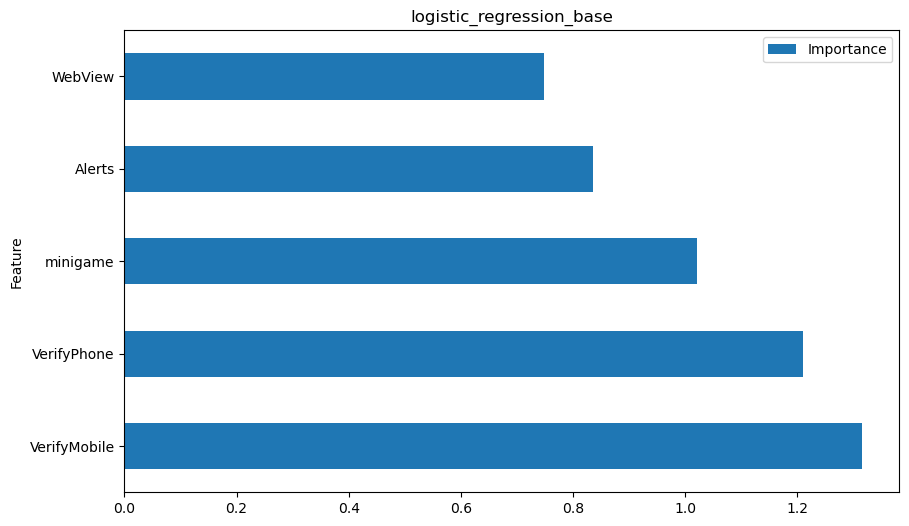

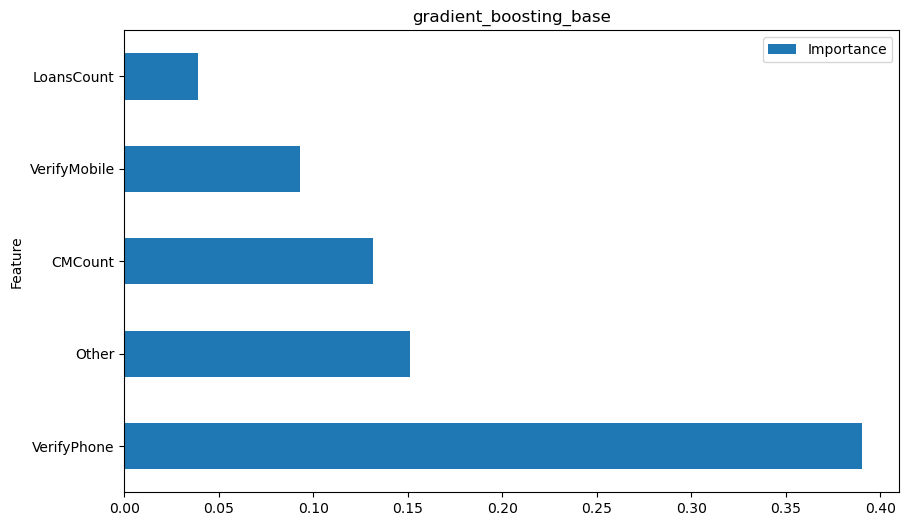

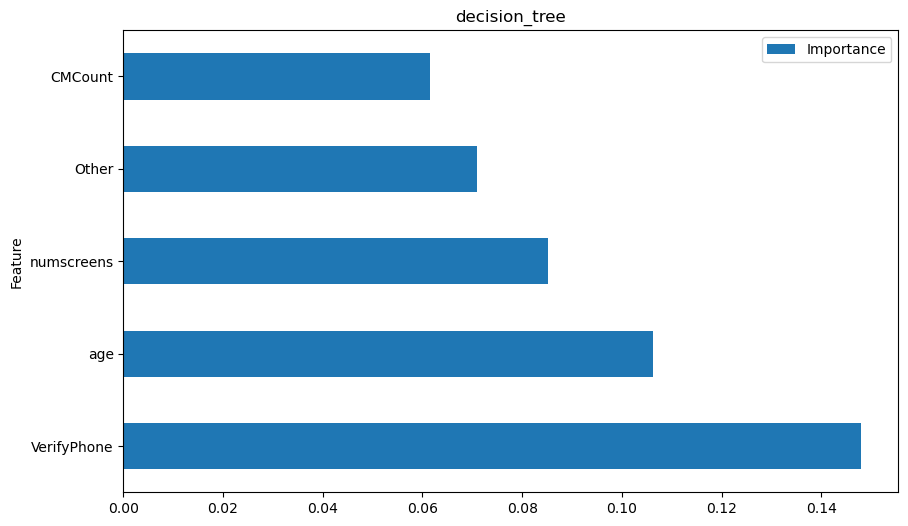

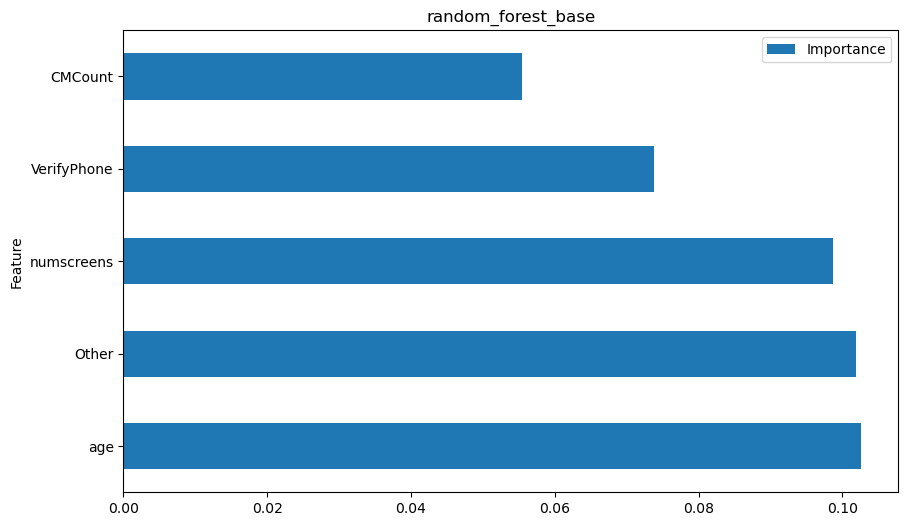

In [114]:
for i in model_dict_base :
    print(i, '\n',run_model(features, model_dict_base, i, x_train, x_test, y_train, y_test), end = '\n\n')

In [76]:
#applying grid search cv on logistic regression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type ('l1' for L1, 'l2' for L2)
}
grid_search = GridSearchCV(model_dict_base['logistic_regression_base'], param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_model = grid_search.best_estimator_
print(best_model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

{'C': 10, 'penalty': 'l2'}
LogisticRegression(C=10)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
# Grid Search cv on adaboostclassifier
# Best parameters: {'learning_rate': 0.5, 'n_estimators': 500}
# param_grid = {
#     'n_estimators': [50, 100, 200,300,500],  # Number of weak learners
#     'learning_rate': [0.1, 0.5, 1.0],  # Learning rate
# }

# ada_boost = AdaBoostClassifier()
# grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='accuracy')

# # Fit the GridSearchCV instance on the data
# grid_search.fit(x_train, y_train)

# Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# ada_pred=grid_search.predict(x_test)
# print("Best parameters:", best_params)
# print("Best cross-validation score:", best_score)
# print(classification_report(y_test, ada_pred))

In [78]:
estimators=[125,150,175,200,250,300,350,400,450,500,600,700,800,900,1000]
for i in range(len(estimators)):
    model = AdaBoostClassifier(n_estimators=estimators[i],learning_rate=0.1)
    model.fit(x_train,y_train)
    ada_pred=model.predict(x_test)
    print("Number of Estimator Used is:",estimators[i])
    print(classification_report(y_test, ada_pred))

Number of Estimator Used is: 125
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      3784
           1       0.77      0.81      0.79      6213

    accuracy                           0.73      9997
   macro avg       0.71      0.71      0.71      9997
weighted avg       0.73      0.73      0.73      9997

Number of Estimator Used is: 150
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      3784
           1       0.77      0.81      0.79      6213

    accuracy                           0.73      9997
   macro avg       0.71      0.71      0.71      9997
weighted avg       0.73      0.73      0.73      9997

Number of Estimator Used is: 175
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      3784
           1       0.77      0.81      0.79      6213

    accuracy                           0.73      9997
   macro avg       0.72      

In [79]:
# Grid Search cv on GradientBoostingClassifier
# Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
# gradient_boosting = GradientBoostingClassifier()

# # Defining the parameter grid to search
# param_grid_boost = {
#     'n_estimators': [50, 100, 200,300,500],  # Number of boosting stages
#     'learning_rate': [0.1,0.3, 0.5, 1.0],  # Learning rate
#     'max_depth': [3, 4, 5],  # Maximum depth of individual estimators
# }

# grid_search_boost = GridSearchCV(gradient_boosting, param_grid_boost, cv=5, scoring='accuracy')

# # Fit the GridSearchCV instance on the data
# grid_search_boost.fit(x_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search_boost.best_params_
# best_score = grid_search_boost.best_score_
# boostingpredict=grid_search_boost.predict(x_test)
# print("Best parameters:", best_params)
# print("Best cross-validation score:", best_score)
# print(classification_report(y_test,boostingpredict))

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
estimator=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in range(len(estimator)):
    boostingmodel = GradientBoostingClassifier(n_estimators=int(estimator[i]*pow(10,3)),learning_rate=0.3)
    boostingmodel.fit(x_train,y_train)
    boostingpredict=boostingmodel.predict(x_test)
    print("Estimator:",estimator[i]*pow(10,3))
    print(classification_report(y_test,boostingpredict))

Estimator: 200.0
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3784
           1       0.82      0.82      0.82      6213

    accuracy                           0.78      9997
   macro avg       0.76      0.76      0.76      9997
weighted avg       0.77      0.78      0.77      9997

Estimator: 300.0
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      3784
           1       0.82      0.83      0.82      6213

    accuracy                           0.78      9997
   macro avg       0.77      0.76      0.77      9997
weighted avg       0.78      0.78      0.78      9997

Estimator: 400.0
              precision    recall  f1-score   support

           0       0.71      0.70      0.70      3784
           1       0.82      0.83      0.82      6213

    accuracy                           0.78      9997
   macro avg       0.77      0.76      0.76      9997
weighted avg       0.78

In [81]:
#Best parameters: {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [80, 100, None],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 5],
#     'min_samples_split': [8, 12],
# }
# grid_search_forest = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# grid_search_forest.fit(x_train, y_train)
# best_params = grid_search_forest.best_params_
# best_score = grid_search_forest.best_score_
# forestpredict=grid_search_forest.predict(x_test)
# print("Best parameters:", best_params)
# print("Best cross-validation score:", best_score)
# print(classification_report(y_test,boostingpredict))

In [82]:
model_dict_tuned={
    "logistic_regression_tuned":LogisticRegression(C=10,
                                                   penalty='l2'),
    "adaboost_tuned":AdaBoostClassifier(n_estimators=500,
                                        learning_rate=0.5),
    "gradient_boosting_tuned":GradientBoostingClassifier(n_estimators=300,
                                                         learning_rate=0.5,
                                                         max_depth=5),
    "random_forest_tuned":RandomForestClassifier(max_depth=None,
                                                 max_features=3,
                                                 min_samples_leaf=3,
                                                 min_samples_split=8,
                                                 n_estimators=300)
}

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic_regression_tuned 
               precision    recall  f1-score   support

           0       0.68      0.63      0.65      3784
           1       0.78      0.82      0.80      6213

    accuracy                           0.75      9997
   macro avg       0.73      0.73      0.73      9997
weighted avg       0.75      0.75      0.75      9997


adaboost_tuned Dosen't Support Feature Importance
adaboost_tuned 
               precision    recall  f1-score   support

           0       0.69      0.63      0.66      3784
           1       0.79      0.83      0.81      6213

    accuracy                           0.75      9997
   macro avg       0.74      0.73      0.73      9997
weighted avg       0.75      0.75      0.75      9997


gradient_boosting_tuned 
               precision    recall  f1-score   support

           0       0.70      0.68      0.69      3784
           1       0.81      0.82      0.82      6213

    accuracy                           0.77      9997
   ma

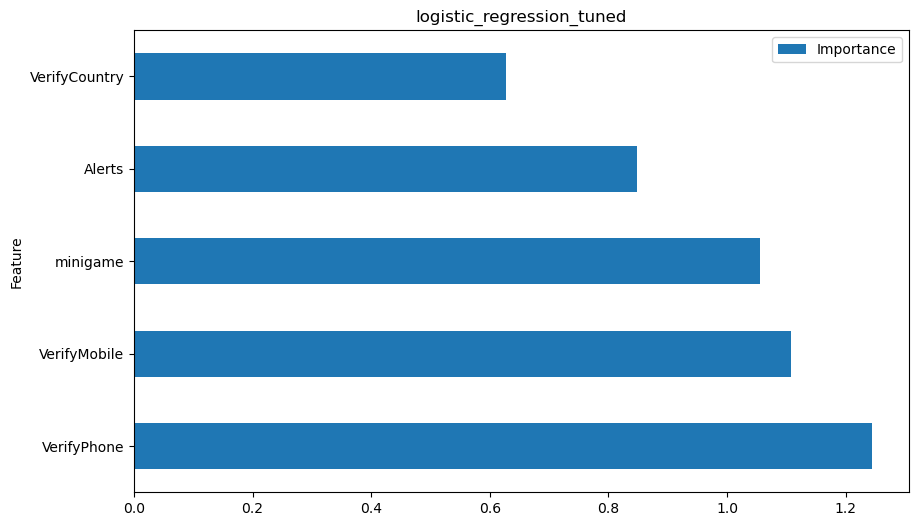

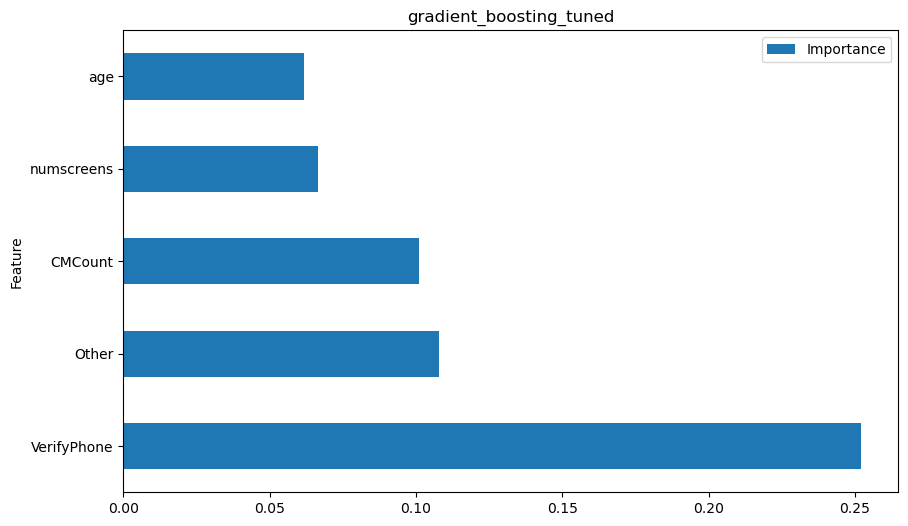

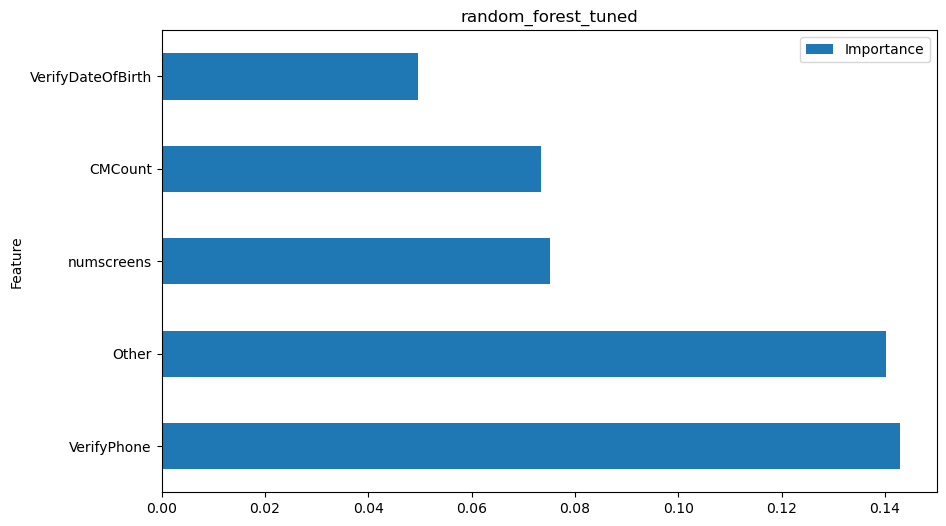

In [115]:
for i in model_dict_tuned :
    print(i, '\n',run_model(features, model_dict_tuned, i, x_train, x_test, y_train, y_test), end = '\n\n')

### Neural Networks

In [84]:
import tensorflow as tf

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# Define a function to create a model
def create_model(n_features, optimizer='adam'):
    # Initialize the constructor
    model = Sequential()
    # We're using a sequential model, which is a linear stack of layers. It's the simplest kind of model, 
    # appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
    
    # Add an input layer 
    model.add(Dense(n_features, activation='relu', input_shape=(n_features,)))
    # Here we're adding the first hidden layer and specifying the input shape which is the number of features in our data. 
    # We're using 50 nodes and the 'relu' activation function.
    
    # Add hidden layer
    model.add(Dense(23, activation='relu'))
    # We're adding a second layer (hidden layer) to our model. This has 30 nodes and also uses the 'relu' activation function.

    # Add an output layer 
    model.add(Dense(1, activation='sigmoid'))
    # We're adding the output layer to our model. Because we're doing binary classification (user will either enroll or not),
    # we only need one node in the output layer. We use a 'sigmoid' activation function to ensure our network output is between 0 and 1 and can be interpreted as a probability.
    
    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    # Here we're compiling the model. Compiling the model takes two arguments: an optimizer and a loss function. We also include 'accuracy' in the metrics to track during training.
    
    return model

# Number of features for the input layer
n_features = x_train_sc.shape[1]
# This gets the number of features in our dataset, which is needed to define the input shape for our model.

# Create models with different optimizers
optimizers = ['adam', 'sgd', 'RMSprop']
# These are the optimizers we will use to train different models and compare their performance.

histories = []
# We create an empty list to store the history of each model. The history will include the loss and accuracy of the model for each epoch.

results = []
# We create another empty list to store the final accuracy of each model.

for opt in optimizers:
    model = create_model(n_features, opt)
    #Here we call the create_model function to create a model with the current optimizer.
    
    history = model.fit(x_train_sc, y_train, epochs=100, batch_size=15, verbose=1, validation_data=(x_test_sc, y_test))
    # We fit the model to our training data, with validation on our test set. We use a batch size of 50 and train for 100 epochs.
    
    histories.append(history)
    # We append the model's history to the histories list.
    results.append({
        'optimizer': opt,
        'final_training_accuracy': history.history['accuracy'][-1],
        'final_validation_accuracy': history.history['val_accuracy'][-1]
    })# This appends a dictionary containing the optimizer used and the final training and validation accuracies to the results list.

results_df = pd.DataFrame(results)
# We convert the results list to a DataFrame for easier viewing and manipulation.
results_df

Epoch 1/100
2666/2666 [==============================] - 4s 1ms/step - loss: 0.5016 - accuracy: 0.7426 - val_loss: 0.4786 - val_accuracy: 0.7655
Epoch 2/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4653 - accuracy: 0.7717 - val_loss: 0.4739 - val_accuracy: 0.7666
Epoch 3/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4534 - accuracy: 0.7794 - val_loss: 0.4657 - val_accuracy: 0.7731
Epoch 4/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4440 - accuracy: 0.7859 - val_loss: 0.4666 - val_accuracy: 0.7689
Epoch 5/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4377 - accuracy: 0.7870 - val_loss: 0.4672 - val_accuracy: 0.7693
Epoch 6/100
2666/2666 [==============================] - 4s 1ms/step - loss: 0.4311 - accuracy: 0.7925 - val_loss: 0.4689 - val_accuracy: 0.7701
Epoch 7/100
2666/2666 [==============================] - 4s 1ms/step - loss: 0.4251 - accuracy: 0.7968 - val_loss: 0.4700 - val_ac

Epoch 57/100
2666/2666 [==============================] - 3s 1000us/step - loss: 0.3143 - accuracy: 0.8557 - val_loss: 0.6626 - val_accuracy: 0.7405
Epoch 58/100
2666/2666 [==============================] - 3s 962us/step - loss: 0.3129 - accuracy: 0.8552 - val_loss: 0.6573 - val_accuracy: 0.7407
Epoch 59/100
2666/2666 [==============================] - 3s 971us/step - loss: 0.3123 - accuracy: 0.8577 - val_loss: 0.6679 - val_accuracy: 0.7417
Epoch 60/100
2666/2666 [==============================] - 3s 993us/step - loss: 0.3106 - accuracy: 0.8573 - val_loss: 0.6663 - val_accuracy: 0.7415
Epoch 61/100
2666/2666 [==============================] - 3s 990us/step - loss: 0.3104 - accuracy: 0.8576 - val_loss: 0.6772 - val_accuracy: 0.7466
Epoch 62/100
2666/2666 [==============================] - 3s 958us/step - loss: 0.3105 - accuracy: 0.8551 - val_loss: 0.6650 - val_accuracy: 0.7404
Epoch 63/100
2666/2666 [==============================] - 3s 956us/step - loss: 0.3095 - accuracy: 0.8577 - val

2666/2666 [==============================] - 3s 1ms/step - loss: 0.4450 - accuracy: 0.7850 - val_loss: 0.4756 - val_accuracy: 0.7656
Epoch 13/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4421 - accuracy: 0.7864 - val_loss: 0.4775 - val_accuracy: 0.7667
Epoch 14/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4393 - accuracy: 0.7887 - val_loss: 0.4764 - val_accuracy: 0.7658
Epoch 15/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4365 - accuracy: 0.7893 - val_loss: 0.4788 - val_accuracy: 0.7673
Epoch 16/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4343 - accuracy: 0.7912 - val_loss: 0.4800 - val_accuracy: 0.7670
Epoch 17/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4318 - accuracy: 0.7932 - val_loss: 0.4798 - val_accuracy: 0.7665
Epoch 18/100
2666/2666 [==============================] - 3s 985us/step - loss: 0.4294 - accuracy: 0.7927 - val_loss: 0.4782 - val_accura

2666/2666 [==============================] - 3s 1ms/step - loss: 0.3604 - accuracy: 0.8328 - val_loss: 0.5622 - val_accuracy: 0.7523
Epoch 69/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.3588 - accuracy: 0.8345 - val_loss: 0.5558 - val_accuracy: 0.7451
Epoch 70/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.3579 - accuracy: 0.8360 - val_loss: 0.5602 - val_accuracy: 0.7495
Epoch 71/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.3571 - accuracy: 0.8361 - val_loss: 0.5705 - val_accuracy: 0.7492
Epoch 72/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.3560 - accuracy: 0.8362 - val_loss: 0.5681 - val_accuracy: 0.7530
Epoch 73/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.3555 - accuracy: 0.8351 - val_loss: 0.5664 - val_accuracy: 0.7505
Epoch 74/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.3552 - accuracy: 0.8356 - val_loss: 0.5658 - val_accuracy

2666/2666 [==============================] - 3s 1ms/step - loss: 0.4282 - accuracy: 0.8036 - val_loss: 0.5036 - val_accuracy: 0.7638
Epoch 25/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4268 - accuracy: 0.8041 - val_loss: 0.5102 - val_accuracy: 0.7698
Epoch 26/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4256 - accuracy: 0.8044 - val_loss: 0.5030 - val_accuracy: 0.7671
Epoch 27/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4246 - accuracy: 0.8052 - val_loss: 0.5095 - val_accuracy: 0.7631
Epoch 28/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4232 - accuracy: 0.8049 - val_loss: 0.5216 - val_accuracy: 0.7615
Epoch 29/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4222 - accuracy: 0.8077 - val_loss: 0.5172 - val_accuracy: 0.7647
Epoch 30/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4215 - accuracy: 0.8080 - val_loss: 0.5119 - val_accuracy

2666/2666 [==============================] - 3s 1ms/step - loss: 0.4038 - accuracy: 0.8215 - val_loss: 0.5774 - val_accuracy: 0.7471
Epoch 81/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4051 - accuracy: 0.8222 - val_loss: 0.5834 - val_accuracy: 0.7445
Epoch 82/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4048 - accuracy: 0.8207 - val_loss: 0.5956 - val_accuracy: 0.7397
Epoch 83/100
2666/2666 [==============================] - 3s 999us/step - loss: 0.4029 - accuracy: 0.8230 - val_loss: 0.5865 - val_accuracy: 0.7473
Epoch 84/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4032 - accuracy: 0.8236 - val_loss: 0.5864 - val_accuracy: 0.7538
Epoch 85/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4037 - accuracy: 0.8225 - val_loss: 0.5675 - val_accuracy: 0.7492
Epoch 86/100
2666/2666 [==============================] - 3s 1ms/step - loss: 0.4049 - accuracy: 0.8212 - val_loss: 0.5820 - val_accura

,optimizer,final_training_accuracy,final_validation_accuracy
0,adam,0.868110,0.735921
1,sgd,0.847229,0.743223
2,RMSprop,0.823197,0.749525


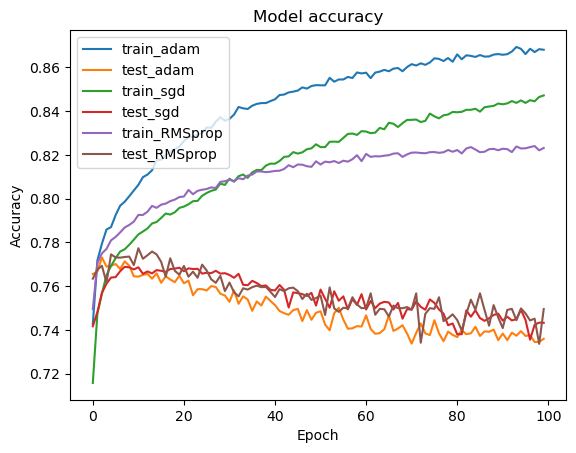

In [87]:
# Plot the accuracy for the models
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label='train_'+optimizers[i])
    plt.plot(history.history['val_accuracy'], label='test_'+optimizers[i])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Why you think your model improved or did not improve?

The models did not improve as during the training, the models displayed a tendency to overfit as training went on. This can be eliminated using dropout and regularization of the models.

Do you think data scaling and categorical variables handling is needed in the dataset? Why or Why not?

Scaling is not necessary as no numerical columns exhibit a huge mismatch in term of maginutdes. Numerical features were treated before hand in such a way. And some variables which seemed numerical but were ordinal were also oneHotEncoded further eliminating the need for scaling for the other models. The features were scaled before training the neural networks as they are really sensitive to feature magnitudes and the features need to be scaled to remove that bias from the models.